In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
from PyHa.annotation_post_processing import *
import pandas as pd

#Possible Datasets
#NIPS4Bplus
#BIRDCLEF2020 DATASET
# SCRIPPS COASTAL RESREVE DATASET


#TODO USE SCRIPPS COASTAL RESREVE DATASET FOR STRONGLY LABELED TO 

In [3]:
path =  "./mixed_bird/025_Mixed_Bird_Outputs_Train/"#"./BirdCLEF2020_Validation_Audio_and_Ground_Truth/audio/min_audio/"
path_to_audio_files = path
path_to_ground_truth = "./mixed_bird/mixed_bird_manual.csv"#./BirdCLEF2020_Validation_Audio_and_Ground_Truth/BIRDCLEF2020_SPECIES_ID.csv"

#"C:\Users\seanh\OneDrive\Desktop\E4E\PyHa\mixed_bird\Mixed_Bird"
#"C:\Users\seanh\OneDrive\Desktop\E4E\PyHa\mixed_bird\mixed_bird_manual.csv"

# Prepare Manual Labels

In [4]:
manual_df = pd.read_csv(path_to_ground_truth)
manual_df

,Unnamed: 0,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME,FOLDER
0,0,Aburria-aburri-257423.wav,24.6335,2.3614,3.3205,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,2:13:53,./TEST/
1,1,Aburria-aburri-257423.wav,24.6335,6.7320,2.0103,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,2:13:53,./TEST/
2,2,Aburria-aburri-257423.wav,24.6335,19.2438,3.4505,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,2:13:53,./TEST/
3,3,Aburria-aburri-387212.wav,84.4800,0.6011,3.0800,24000,0,44100,Aburria aburri Wattled Guan,184.388,alarce,11/22/2021,3:28:01,./TEST/
4,4,Aburria-aburri-387212.wav,84.4800,77.6811,3.1400,24000,0,44100,Aburria aburri Wattled Guan,184.385,alarce,11/22/2021,3:28:01,./TEST/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31360,31360,Zonotrichia-capensis-232609.wav,98.8560,63.2772,1.8301,24000,0,32000,Zonotrichia capensis Rufous-collared Sparrow,623.174,JacobGlennAyers,10/10/2021,2:06:40,./TEST/
31361,31361,Zonotrichia-capensis-232609.wav,98.8560,34.1554,2.4702,24000,0,32000,Zonotrichia capensis Rufous-collared Sparrow,623.135,JacobGlennAyers,10/10/2021,2:06:40,./TEST/
31362,31362,Zonotrichia-capensis-377483.wav,18.2596,0.5762,3.2199,24000,0,44100,Zonotrichia capensis Rufous-collared Sparrow,229.527,JacobGlennAyers,10/18/2021,17:33:36,./TEST/
31363,31363,Zonotrichia-capensis-377483.wav,18.2596,6.8160,2.1500,24000,0,44100,Zonotrichia capensis Rufous-collared Sparrow,229.543,JacobGlennAyers,10/18/2021,17:33:36,./TEST/


## Convert Strong Labels into Weakly Labeled Data

In [5]:
weakly_manual_df = manual_df.groupby(by=["IN FILE", "MANUAL ID"]).count().get(["FOLDER"])
weakly_manual_df["COUNTS"] = weakly_manual_df["FOLDER"]
weakly_manual_df = weakly_manual_df[["COUNTS"]]
weakly_manual_df = weakly_manual_df.reset_index()
#max_count_of_file = weakly_manual_df.groupby(by="IN FILE").max()
#max_count_of_file
weakly_manual_df

weak_label = pd.DataFrame()
for file in np.unique(weakly_manual_df["IN FILE"]):
    weakly_clip_df = weakly_manual_df[weakly_manual_df["IN FILE"] == file]
    weakly_clip_df = weakly_clip_df.sort_values(by="COUNTS", ascending=False)
    if (weak_label.empty):
        weak_label = weakly_clip_df.head(1)
    else:
        weak_label = weak_label.append(weakly_clip_df.head(1))
weak_label = weak_label.reset_index(drop=True).drop(labels="COUNTS", axis=1).set_index("IN FILE")
weak_label

,MANUAL ID
IN FILE,
Aburria-aburri-257423.wav,Aburria aburri Wattled Guan
Aburria-aburri-387212.wav,Aburria aburri Wattled Guan
Accipiter-bicolor-451839.wav,Accipiter bicolor Bicolored Hawk
Accipiter-collaris-260335.wav,Accipiter collaris Semicollared Hawk
Accipiter-collaris-260336.wav,Accipiter collaris Semicollared Hawk
...,...
Zimmerius-gracilipes-258668.wav,Zimmerius gracilipes Slender-footed Tyrannulet
Zimmerius-gracilipes-258669.wav,Zimmerius gracilipes Slender-footed Tyrannulet
Zonotrichia-capensis-232609.wav,Zonotrichia capensis Rufous-collared Sparrow


In [6]:
def mixed_bird_fix(manual_id):
    id_arr = manual_id.split(" ")
    return id_arr[0] + " " +  id_arr[1]

#weak_label["MANUAL ID"] = weak_label["MANUAL ID"].apply(mixed_bird_fix)
weak_label

,MANUAL ID
IN FILE,
Aburria-aburri-257423.wav,Aburria aburri Wattled Guan
Aburria-aburri-387212.wav,Aburria aburri Wattled Guan
Accipiter-bicolor-451839.wav,Accipiter bicolor Bicolored Hawk
Accipiter-collaris-260335.wav,Accipiter collaris Semicollared Hawk
Accipiter-collaris-260336.wav,Accipiter collaris Semicollared Hawk
...,...
Zimmerius-gracilipes-258668.wav,Zimmerius gracilipes Slender-footed Tyrannulet
Zimmerius-gracilipes-258669.wav,Zimmerius gracilipes Slender-footed Tyrannulet
Zonotrichia-capensis-232609.wav,Zonotrichia capensis Rufous-collared Sparrow


In [7]:
input()

''

In [8]:
def apply_weak_labels(df):
    def add_weak_label(filename):
        return weak_label.loc[filename]
    df = df[df["IN FILE"].isin(weak_label.index)] 
    df["MANUAL ID"] = df["IN FILE"].apply(add_weak_label)
    return df

# Tweetynet


In [9]:
# Example parameters for TweetyNET
isolation_parameters = {
     "model" : "tweetynet",
     "tweety_output": True,
    "technique" : "steinberg",
     "threshold_type" : "median",
     "threshold_const" : 2.0,
     "threshold_min" : 0.0,
     "window_size" : 2.0,
     "chunk_size" : 5.0
}

In [10]:
automated_df_tweety = generate_automated_labels(path,isolation_parameters);
automated_df_tweety

606
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -4.833280
1   0_f     0      0   0.023256    -3.701518
2   0_f     0      0   0.046512    -3.467365
3   0_f     0      0   0.069767    -3.384236
4   0_f     0      0   0.093023    -3.477273
..  ...   ...    ...        ...          ...
81  1_f     1      0   3.883721     3.616277
82  1_f     1      0   3.906977     3.297105
83  1_f     1      0   3.930233     4.046923
84  1_f     1      0   3.953488     4.147713
85  1_f     1      0   3.976744     3.894883

[172 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -4.833280
1   0_f     0      0   0.023256    -3.701518
2   0_f     0      0   0.046512    -3.467365
3   0_f     0      0   0.069767    -3.384236
4   0_f     0      0   0.093023    -3.477273
..  ...   ...    ...        ...          ...
81  1_f     1      0   3.883721     3.616277
82  1_f     1      0   3.906977     3.297105
83  1_f     1      0   3.93

[1118 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.985653
1    0_f     0      0   0.023256    -5.878479
2    0_f     0      0   0.046512    -6.336348
3    0_f     0      0   0.069767    -5.748624
4    0_f     0      0   0.093023    -4.790153
..   ...   ...    ...        ...          ...
81  12_f     1      0  25.883721     2.435532
82  12_f     1      0  25.906977     2.580259
83  12_f     1      0  25.930233     3.176927
84  12_f     1      0  25.953488     2.238385
85  12_f     1      0  25.976744     1.444996

[1118 rows x 5 columns]
False
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.104398
1    0_f     0      0   0.023256    -4.389918
2    0_f     0      0   0.046512    -4.874740
3    0_f     0      0   0.069767    -6.293988
4    0_f     0      0   0.093023    -7.021342
..   ...   ...    ...        ...          ...
81  16_f     0      0  33.883721    -1.957798
82  16_f     0      0  33

    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -3.653386
1   0_f     0      0   0.023256    -3.055143
2   0_f     0      0   0.046512    -3.233447
3   0_f     0      0   0.069767    -4.150421
4   0_f     0      0   0.093023    -4.092328
..  ...   ...    ...        ...          ...
81  5_f     0      0  11.883721    -4.016160
82  5_f     0      0  11.906977    -2.629039
83  5_f     0      0  11.930233    -2.238097
84  5_f     0      0  11.953488    -1.846467
85  5_f     0      0  11.976744    -1.978007

[516 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -3.653386
1   0_f     0      0   0.023256    -3.055143
2   0_f     0      0   0.046512    -3.233447
3   0_f     0      0   0.069767    -4.150421
4   0_f     0      0   0.093023    -4.092328
..  ...   ...    ...        ...          ...
81  5_f     0      0  11.883721    -4.016160
82  5_f     0      0  11.906977    -2.629039
83  5_f     0      0  11.930233

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.070348
1    0_f     0      0   0.023256    -5.790708
2    0_f     0      0   0.046512    -5.949732
3    0_f     0      0   0.069767    -6.593655
4    0_f     0      0   0.093023    -6.624616
..   ...   ...    ...        ...          ...
81  29_f     0      0  59.883721    -3.148190
82  29_f     0      0  59.906977    -3.018342
83  29_f     0      0  59.930233    -2.388313
84  29_f     0      0  59.953488    -2.071614
85  29_f     0      0  59.976744    -1.790040

[2580 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.070348
1    0_f     0      0   0.023256    -5.790708
2    0_f     0      0   0.046512    -5.949732
3    0_f     0      0   0.069767    -6.593655
4    0_f     0      0   0.093023    -6.624616
..   ...   ...    ...        ...          ...
81  29_f     0      0  59.883721    -3.148190
82  29_f     0      0  59.906977    -3.018342
83  29_f 

    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -3.994420
1   0_f     0      0   0.023256    -5.055073
2   0_f     0      0   0.046512    -6.432346
3   0_f     0      0   0.069767    -7.467344
4   0_f     0      0   0.093023    -7.877450
..  ...   ...    ...        ...          ...
81  7_f     0      0  15.883721    -3.550055
82  7_f     0      0  15.906977    -3.029669
83  7_f     0      0  15.930233    -2.943412
84  7_f     0      0  15.953488    -1.871417
85  7_f     0      0  15.976744    -1.628250

[688 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -3.994420
1   0_f     0      0   0.023256    -5.055073
2   0_f     0      0   0.046512    -6.432346
3   0_f     0      0   0.069767    -7.467344
4   0_f     0      0   0.093023    -7.877450
..  ...   ...    ...        ...          ...
81  7_f     0      0  15.883721    -3.550055
82  7_f     0      0  15.906977    -3.029669
83  7_f     0      0  15.930233

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.408501
1    0_f     0      0   0.023256    -4.188788
2    0_f     0      0   0.046512    -4.739226
3    0_f     0      0   0.069767    -4.814711
4    0_f     0      0   0.093023    -4.656369
..   ...   ...    ...        ...          ...
81  13_f     1      0  27.883721     0.386548
82  13_f     1      0  27.906977     0.504246
83  13_f     1      0  27.930233     0.257031
84  13_f     1      0  27.953488     0.211425
85  13_f     0      0  27.976744     0.103528

[1204 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.408501
1    0_f     0      0   0.023256    -4.188788
2    0_f     0      0   0.046512    -4.739226
3    0_f     0      0   0.069767    -4.814711
4    0_f     0      0   0.093023    -4.656369
..   ...   ...    ...        ...          ...
81  13_f     1      0  27.883721     0.386548
82  13_f     1      0  27.906977     0.504246
83  13_f 

    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -1.345523
1   0_f     0      0   0.023256    -2.119679
2   0_f     0      0   0.046512    -3.348554
3   0_f     0      0   0.069767    -4.039668
4   0_f     0      0   0.093023    -4.360573
..  ...   ...    ...        ...          ...
81  9_f     0      0  19.883721    -4.131775
82  9_f     0      0  19.906977    -3.607186
83  9_f     0      0  19.930233    -3.287683
84  9_f     0      0  19.953488    -2.446774
85  9_f     0      0  19.976744    -1.886742

[860 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -1.345523
1   0_f     0      0   0.023256    -2.119679
2   0_f     0      0   0.046512    -3.348554
3   0_f     0      0   0.069767    -4.039668
4   0_f     0      0   0.093023    -4.360573
..  ...   ...    ...        ...          ...
81  9_f     0      0  19.883721    -4.131775
82  9_f     0      0  19.906977    -3.607186
83  9_f     0      0  19.930233

    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -7.287590
1   0_f     0      0   0.023256    -6.252053
2   0_f     0      0   0.046512    -5.599868
3   0_f     0      0   0.069767    -5.810668
4   0_f     0      0   0.093023    -5.414032
..  ...   ...    ...        ...          ...
81  2_f     0      0   5.883721    -3.042595
82  2_f     0      0   5.906977    -1.785382
83  2_f     0      0   5.930233    -0.978016
84  2_f     0      0   5.953488    -1.787431
85  2_f     0      0   5.976744    -1.335475

[258 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -7.287590
1   0_f     0      0   0.023256    -6.252053
2   0_f     0      0   0.046512    -5.599868
3   0_f     0      0   0.069767    -5.810668
4   0_f     0      0   0.093023    -5.414032
..  ...   ...    ...        ...          ...
81  2_f     0      0   5.883721    -3.042595
82  2_f     0      0   5.906977    -1.785382
83  2_f     0      0   5.930233

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.965747
1    0_f     0      0   0.023256    -4.519628
2    0_f     0      0   0.046512    -5.796208
3    0_f     0      0   0.069767    -6.702212
4    0_f     0      0   0.093023    -7.200224
..   ...   ...    ...        ...          ...
81  12_f     0      0  25.883721    -3.362004
82  12_f     0      0  25.906977    -2.542086
83  12_f     0      0  25.930233    -2.157409
84  12_f     0      0  25.953488    -2.002688
85  12_f     0      0  25.976744    -1.906590

[1118 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.965747
1    0_f     0      0   0.023256    -4.519628
2    0_f     0      0   0.046512    -5.796208
3    0_f     0      0   0.069767    -6.702212
4    0_f     0      0   0.093023    -7.200224
..   ...   ...    ...        ...          ...
81  12_f     0      0  25.883721    -3.362004
82  12_f     0      0  25.906977    -2.542086
83  12_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.967700
1    0_f     0      0   0.023256    -3.777540
2    0_f     0      0   0.046512    -4.870111
3    0_f     0      0   0.069767    -4.921174
4    0_f     0      0   0.093023    -4.047774
..   ...   ...    ...        ...          ...
81  11_f     0      0  23.883721    -3.560032
82  11_f     0      0  23.906977    -3.295158
83  11_f     0      0  23.930233    -2.367137
84  11_f     0      0  23.953488    -1.666393
85  11_f     0      0  23.976744    -1.519338

[1032 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.967700
1    0_f     0      0   0.023256    -3.777540
2    0_f     0      0   0.046512    -4.870111
3    0_f     0      0   0.069767    -4.921174
4    0_f     0      0   0.093023    -4.047774
..   ...   ...    ...        ...          ...
81  11_f     0      0  23.883721    -3.560032
82  11_f     0      0  23.906977    -3.295158
83  11_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.762541
1    0_f     0      0   0.023256    -6.877158
2    0_f     0      0   0.046512    -7.519910
3    0_f     0      0   0.069767    -7.585340
4    0_f     0      0   0.093023    -6.799784
..   ...   ...    ...        ...          ...
81  15_f     1      0  31.883721     6.993969
82  15_f     1      0  31.906977     7.315772
83  15_f     1      0  31.930233     7.712893
84  15_f     1      0  31.953488     7.664932
85  15_f     1      0  31.976744     6.110854

[1376 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.762541
1    0_f     0      0   0.023256    -6.877158
2    0_f     0      0   0.046512    -7.519910
3    0_f     0      0   0.069767    -7.585340
4    0_f     0      0   0.093023    -6.799784
..   ...   ...    ...        ...          ...
81  15_f     1      0  31.883721     6.993969
82  15_f     1      0  31.906977     7.315772
83  15_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -1.028385
1    0_f     0      0   0.023256    -0.505002
2    0_f     1      0   0.046512     0.930839
3    0_f     1      0   0.069767     1.105782
4    0_f     1      0   0.093023     1.214288
..   ...   ...    ...        ...          ...
81  14_f     0      0  29.883721    -2.526327
82  14_f     0      0  29.906977    -1.984154
83  14_f     0      0  29.930233    -2.162893
84  14_f     0      0  29.953488    -1.401484
85  14_f     0      0  29.976744    -0.843051

[1290 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -1.028385
1    0_f     0      0   0.023256    -0.505002
2    0_f     1      0   0.046512     0.930839
3    0_f     1      0   0.069767     1.105782
4    0_f     1      0   0.093023     1.214288
..   ...   ...    ...        ...          ...
81  14_f     0      0  29.883721    -2.526327
82  14_f     0      0  29.906977    -1.984154
83  14_f 

    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -4.993694
1   0_f     0      0   0.023256    -4.740441
2   0_f     0      0   0.046512    -5.188013
3   0_f     0      0   0.069767    -6.390611
4   0_f     0      0   0.093023    -6.885793
..  ...   ...    ...        ...          ...
81  5_f     0      0  11.883721    -3.512234
82  5_f     0      0  11.906977    -3.302288
83  5_f     0      0  11.930233    -3.133656
84  5_f     0      0  11.953488    -2.549043
85  5_f     0      0  11.976744    -2.697872

[516 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -4.993694
1   0_f     0      0   0.023256    -4.740441
2   0_f     0      0   0.046512    -5.188013
3   0_f     0      0   0.069767    -6.390611
4   0_f     0      0   0.093023    -6.885793
..  ...   ...    ...        ...          ...
81  5_f     0      0  11.883721    -3.512234
82  5_f     0      0  11.906977    -3.302288
83  5_f     0      0  11.930233

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.890549
1    0_f     0      0   0.023256    -3.697701
2    0_f     0      0   0.046512    -3.369941
3    0_f     0      0   0.069767    -3.588296
4    0_f     0      0   0.093023    -3.297562
..   ...   ...    ...        ...          ...
81  14_f     0      0  29.883721    -3.683813
82  14_f     0      0  29.906977    -3.417620
83  14_f     0      0  29.930233    -2.745256
84  14_f     0      0  29.953488    -2.303236
85  14_f     0      0  29.976744    -1.817012

[1290 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.890549
1    0_f     0      0   0.023256    -3.697701
2    0_f     0      0   0.046512    -3.369941
3    0_f     0      0   0.069767    -3.588296
4    0_f     0      0   0.093023    -3.297562
..   ...   ...    ...        ...          ...
81  14_f     0      0  29.883721    -3.683813
82  14_f     0      0  29.906977    -3.417620
83  14_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.335951
1    0_f     0      0   0.023256    -3.080653
2    0_f     0      0   0.046512    -2.947216
3    0_f     0      0   0.069767    -2.904856
4    0_f     0      0   0.093023    -1.994862
..   ...   ...    ...        ...          ...
81  19_f     0      0  39.883721    -1.373272
82  19_f     0      0  39.906977    -1.126479
83  19_f     0      0  39.930233    -2.043675
84  19_f     0      0  39.953488    -2.748901
85  19_f     0      0  39.976744    -1.855145

[1720 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.335951
1    0_f     0      0   0.023256    -3.080653
2    0_f     0      0   0.046512    -2.947216
3    0_f     0      0   0.069767    -2.904856
4    0_f     0      0   0.093023    -1.994862
..   ...   ...    ...        ...          ...
81  19_f     0      0  39.883721    -1.373272
82  19_f     0      0  39.906977    -1.126479
83  19_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.610821
1    0_f     0      0   0.023256    -4.866317
2    0_f     0      0   0.046512    -5.923105
3    0_f     0      0   0.069767    -6.150277
4    0_f     0      0   0.093023    -5.688415
..   ...   ...    ...        ...          ...
81  17_f     0      0  35.883721    -2.777788
82  17_f     0      0  35.906977    -2.697437
83  17_f     0      0  35.930233    -2.067405
84  17_f     0      0  35.953488    -1.990546
85  17_f     0      0  35.976744    -2.392989

[1548 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.610821
1    0_f     0      0   0.023256    -4.866317
2    0_f     0      0   0.046512    -5.923105
3    0_f     0      0   0.069767    -6.150277
4    0_f     0      0   0.093023    -5.688415
..   ...   ...    ...        ...          ...
81  17_f     0      0  35.883721    -2.777788
82  17_f     0      0  35.906977    -2.697437
83  17_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.222165
1    0_f     0      0   0.023256    -1.086275
2    0_f     1      0   0.046512     0.571870
3    0_f     1      0   0.069767     0.705986
4    0_f     1      0   0.093023     1.210691
..   ...   ...    ...        ...          ...
81  20_f     1      0  41.883721     2.458340
82  20_f     1      0  41.906977     2.079091
83  20_f     1      0  41.930233     2.086058
84  20_f     1      0  41.953488     1.643659
85  20_f     1      0  41.976744     0.434117

[1806 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.222165
1    0_f     0      0   0.023256    -1.086275
2    0_f     1      0   0.046512     0.571870
3    0_f     1      0   0.069767     0.705986
4    0_f     1      0   0.093023     1.210691
..   ...   ...    ...        ...          ...
81  20_f     1      0  41.883721     2.458340
82  20_f     1      0  41.906977     2.079091
83  20_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.622221
1    0_f     0      0   0.023256    -5.800119
2    0_f     0      0   0.046512    -5.731252
3    0_f     0      0   0.069767    -5.786113
4    0_f     0      0   0.093023    -4.815073
..   ...   ...    ...        ...          ...
81  11_f     0      0  23.883721    -2.505042
82  11_f     0      0  23.906977    -2.043280
83  11_f     0      0  23.930233    -2.421517
84  11_f     0      0  23.953488    -1.534797
85  11_f     0      0  23.976744    -1.275922

[1032 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.622221
1    0_f     0      0   0.023256    -5.800119
2    0_f     0      0   0.046512    -5.731252
3    0_f     0      0   0.069767    -5.786113
4    0_f     0      0   0.093023    -4.815073
..   ...   ...    ...        ...          ...
81  11_f     0      0  23.883721    -2.505042
82  11_f     0      0  23.906977    -2.043280
83  11_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.776818
1    0_f     0      0   0.023256    -6.678343
2    0_f     0      0   0.046512    -6.458253
3    0_f     0      0   0.069767    -6.537704
4    0_f     0      0   0.093023    -6.835223
..   ...   ...    ...        ...          ...
81  45_f     0      0  91.883721    -0.404346
82  45_f     0      0  91.906977    -1.127991
83  45_f     0      0  91.930233    -1.310991
84  45_f     0      0  91.953488    -0.463960
85  45_f     0      0  91.976744    -1.061391

[3956 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.776818
1    0_f     0      0   0.023256    -6.678343
2    0_f     0      0   0.046512    -6.458253
3    0_f     0      0   0.069767    -6.537704
4    0_f     0      0   0.093023    -6.835223
..   ...   ...    ...        ...          ...
81  45_f     0      0  91.883721    -0.404346
82  45_f     0      0  91.906977    -1.127991
83  45_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.201100
1    0_f     0      0   0.023256    -4.889750
2    0_f     0      0   0.046512    -5.722256
3    0_f     0      0   0.069767    -6.496041
4    0_f     0      0   0.093023    -5.876244
..   ...   ...    ...        ...          ...
81  49_f     0      0  99.883721    -2.747691
82  49_f     0      0  99.906977    -2.537250
83  49_f     0      0  99.930233    -1.998510
84  49_f     0      0  99.953488    -1.754677
85  49_f     0      0  99.976744    -1.960125

[4300 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.201100
1    0_f     0      0   0.023256    -4.889750
2    0_f     0      0   0.046512    -5.722256
3    0_f     0      0   0.069767    -6.496041
4    0_f     0      0   0.093023    -5.876244
..   ...   ...    ...        ...          ...
81  49_f     0      0  99.883721    -2.747691
82  49_f     0      0  99.906977    -2.537250
83  49_f 

    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -3.398953
1   0_f     0      0   0.023256    -4.646440
2   0_f     0      0   0.046512    -5.964978
3   0_f     0      0   0.069767    -6.954597
4   0_f     0      0   0.093023    -6.664300
..  ...   ...    ...        ...          ...
81  8_f     0      0  17.883721    -4.505388
82  8_f     0      0  17.906977    -3.710721
83  8_f     0      0  17.930233    -3.193124
84  8_f     0      0  17.953488    -2.933485
85  8_f     0      0  17.976744    -2.522174

[774 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -3.398953
1   0_f     0      0   0.023256    -4.646440
2   0_f     0      0   0.046512    -5.964978
3   0_f     0      0   0.069767    -6.954597
4   0_f     0      0   0.093023    -6.664300
..  ...   ...    ...        ...          ...
81  8_f     0      0  17.883721    -4.505388
82  8_f     0      0  17.906977    -3.710721
83  8_f     0      0  17.930233

[688 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -4.425572
1   0_f     0      0   0.023256    -5.159747
2   0_f     0      0   0.046512    -5.611753
3   0_f     0      0   0.069767    -6.129552
4   0_f     0      0   0.093023    -5.885114
..  ...   ...    ...        ...          ...
81  7_f     0      0  15.883721    -3.898604
82  7_f     0      0  15.906977    -3.841269
83  7_f     0      0  15.930233    -2.666185
84  7_f     0      0  15.953488    -1.602552
85  7_f     0      0  15.976744    -1.637936

[688 rows x 5 columns]
False
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.352431
1    0_f     0      0   0.023256    -4.781370
2    0_f     0      0   0.046512    -6.011912
3    0_f     0      0   0.069767    -6.796603
4    0_f     0      0   0.093023    -6.882178
..   ...   ...    ...        ...          ...
81  16_f     0      0  33.883721    -2.296416
82  16_f     0      0  33.906977    -2.

    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -3.397103
1   0_f     0      0   0.023256    -4.026445
2   0_f     0      0   0.046512    -3.325501
3   0_f     0      0   0.069767    -4.143516
4   0_f     0      0   0.093023    -4.606343
..  ...   ...    ...        ...          ...
81  5_f     0      0  11.883721    -3.299576
82  5_f     0      0  11.906977    -2.802240
83  5_f     0      0  11.930233    -2.532562
84  5_f     0      0  11.953488    -1.428172
85  5_f     0      0  11.976744    -1.665109

[516 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -3.397103
1   0_f     0      0   0.023256    -4.026445
2   0_f     0      0   0.046512    -3.325501
3   0_f     0      0   0.069767    -4.143516
4   0_f     0      0   0.093023    -4.606343
..  ...   ...    ...        ...          ...
81  5_f     0      0  11.883721    -3.299576
82  5_f     0      0  11.906977    -2.802240
83  5_f     0      0  11.930233

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.710319
1    0_f     0      0   0.023256    -4.231833
2    0_f     0      0   0.046512    -4.354252
3    0_f     0      0   0.069767    -4.956104
4    0_f     0      0   0.093023    -4.192413
..   ...   ...    ...        ...          ...
81  24_f     0      0  49.883721    -0.114941
82  24_f     0      0  49.906977    -0.378155
83  24_f     0      0  49.930233     0.060327
84  24_f     1      0  49.953488     0.685351
85  24_f     1      0  49.976744     1.078852

[2150 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.710319
1    0_f     0      0   0.023256    -4.231833
2    0_f     0      0   0.046512    -4.354252
3    0_f     0      0   0.069767    -4.956104
4    0_f     0      0   0.093023    -4.192413
..   ...   ...    ...        ...          ...
81  24_f     0      0  49.883721    -0.114941
82  24_f     0      0  49.906977    -0.378155
83  24_f 

    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -6.086414
1   0_f     0      0   0.023256    -6.146676
2   0_f     0      0   0.046512    -5.084104
3   0_f     0      0   0.069767    -4.982089
4   0_f     0      0   0.093023    -5.507259
..  ...   ...    ...        ...          ...
81  9_f     1      0  19.883721     1.251899
82  9_f     1      0  19.906977     1.425084
83  9_f     1      0  19.930233     0.889516
84  9_f     0      0  19.953488     0.104184
85  9_f     1      0  19.976744     0.241266

[860 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -6.086414
1   0_f     0      0   0.023256    -6.146676
2   0_f     0      0   0.046512    -5.084104
3   0_f     0      0   0.069767    -4.982089
4   0_f     0      0   0.093023    -5.507259
..  ...   ...    ...        ...          ...
81  9_f     1      0  19.883721     1.251899
82  9_f     1      0  19.906977     1.425084
83  9_f     1      0  19.930233

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.669729
1    0_f     0      0   0.023256    -4.021646
2    0_f     0      0   0.046512    -5.161073
3    0_f     0      0   0.069767    -5.919742
4    0_f     0      0   0.093023    -5.428551
..   ...   ...    ...        ...          ...
81  22_f     1      0  45.883721     0.559194
82  22_f     1      0  45.906977     0.178293
83  22_f     0      0  45.930233    -0.177940
84  22_f     0      0  45.953488    -0.729781
85  22_f     0      0  45.976744    -0.663717

[1978 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.669729
1    0_f     0      0   0.023256    -4.021646
2    0_f     0      0   0.046512    -5.161073
3    0_f     0      0   0.069767    -5.919742
4    0_f     0      0   0.093023    -5.428551
..   ...   ...    ...        ...          ...
81  22_f     1      0  45.883721     0.559194
82  22_f     1      0  45.906977     0.178293
83  22_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.906348
1    0_f     0      0   0.023256    -5.500765
2    0_f     0      0   0.046512    -6.157014
3    0_f     0      0   0.069767    -6.735983
4    0_f     0      0   0.093023    -6.482347
..   ...   ...    ...        ...          ...
81  30_f     0      0  61.883721    -0.892335
82  30_f     0      0  61.906977    -0.406328
83  30_f     1      0  61.930233     0.888855
84  30_f     1      0  61.953488     0.898778
85  30_f     1      0  61.976744     0.650510

[2666 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.906348
1    0_f     0      0   0.023256    -5.500765
2    0_f     0      0   0.046512    -6.157014
3    0_f     0      0   0.069767    -6.735983
4    0_f     0      0   0.093023    -6.482347
..   ...   ...    ...        ...          ...
81  30_f     0      0  61.883721    -0.892335
82  30_f     0      0  61.906977    -0.406328
83  30_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.460558
1    0_f     0      0   0.023256    -2.656338
2    0_f     0      0   0.046512    -2.321629
3    0_f     0      0   0.069767    -2.986513
4    0_f     0      0   0.093023    -4.662560
..   ...   ...    ...        ...          ...
81  29_f     1      0  59.883721     5.656546
82  29_f     1      0  59.906977     5.156096
83  29_f     1      0  59.930233     3.805305
84  29_f     1      0  59.953488     4.088961
85  29_f     1      0  59.976744     4.027013

[2580 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.460558
1    0_f     0      0   0.023256    -2.656338
2    0_f     0      0   0.046512    -2.321629
3    0_f     0      0   0.069767    -2.986513
4    0_f     0      0   0.093023    -4.662560
..   ...   ...    ...        ...          ...
81  29_f     1      0  59.883721     5.656546
82  29_f     1      0  59.906977     5.156096
83  29_f 

[774 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -4.872758
1   0_f     0      0   0.023256    -4.647751
2   0_f     0      0   0.046512    -3.966047
3   0_f     0      0   0.069767    -4.326617
4   0_f     0      0   0.093023    -3.222498
..  ...   ...    ...        ...          ...
81  8_f     0      0  17.883721    -1.949836
82  8_f     0      0  17.906977    -1.714932
83  8_f     0      0  17.930233    -1.337804
84  8_f     0      0  17.953488    -0.674313
85  8_f     0      0  17.976744    -0.327206

[774 rows x 5 columns]
False
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -5.034731
1   0_f     0      0   0.023256    -3.942979
2   0_f     0      0   0.046512    -5.558864
3   0_f     0      0   0.069767    -5.660092
4   0_f     0      0   0.093023    -5.686288
..  ...   ...    ...        ...          ...
81  6_f     1      0  13.883721     3.479078
82  6_f     1      0  13.906977     2.834400
83

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.746230
1    0_f     0      0   0.023256    -2.262205
2    0_f     0      0   0.046512    -4.808115
3    0_f     0      0   0.069767    -4.757517
4    0_f     0      0   0.093023    -4.912200
..   ...   ...    ...        ...          ...
81  23_f     0      0  47.883721    -3.613435
82  23_f     0      0  47.906977    -3.258029
83  23_f     0      0  47.930233    -2.929832
84  23_f     0      0  47.953488    -2.093888
85  23_f     0      0  47.976744    -2.126335

[2064 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.746230
1    0_f     0      0   0.023256    -2.262205
2    0_f     0      0   0.046512    -4.808115
3    0_f     0      0   0.069767    -4.757517
4    0_f     0      0   0.093023    -4.912200
..   ...   ...    ...        ...          ...
81  23_f     0      0  47.883721    -3.613435
82  23_f     0      0  47.906977    -3.258029
83  23_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.614123
1    0_f     0      0   0.023256    -1.886759
2    0_f     0      0   0.046512    -1.293866
3    0_f     0      0   0.069767    -0.943967
4    0_f     0      0   0.093023    -0.246066
..   ...   ...    ...        ...          ...
81  17_f     1      0  35.883721     3.733806
82  17_f     1      0  35.906977     3.034424
83  17_f     1      0  35.930233     2.439316
84  17_f     1      0  35.953488     1.565261
85  17_f     1      0  35.976744     1.060859

[1548 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.614123
1    0_f     0      0   0.023256    -1.886759
2    0_f     0      0   0.046512    -1.293866
3    0_f     0      0   0.069767    -0.943967
4    0_f     0      0   0.093023    -0.246066
..   ...   ...    ...        ...          ...
81  17_f     1      0  35.883721     3.733806
82  17_f     1      0  35.906977     3.034424
83  17_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.129266
1    0_f     0      0   0.023256    -3.766931
2    0_f     0      0   0.046512    -4.873905
3    0_f     0      0   0.069767    -5.296916
4    0_f     0      0   0.093023    -4.996928
..   ...   ...    ...        ...          ...
81  14_f     0      0  29.883721    -3.406850
82  14_f     0      0  29.906977    -3.150995
83  14_f     0      0  29.930233    -2.579806
84  14_f     0      0  29.953488    -1.593956
85  14_f     0      0  29.976744    -1.650693

[1290 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.129266
1    0_f     0      0   0.023256    -3.766931
2    0_f     0      0   0.046512    -4.873905
3    0_f     0      0   0.069767    -5.296916
4    0_f     0      0   0.093023    -4.996928
..   ...   ...    ...        ...          ...
81  14_f     0      0  29.883721    -3.406850
82  14_f     0      0  29.906977    -3.150995
83  14_f 

[946 rows x 5 columns]
False
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -6.443559
1   0_f     0      0   0.023256    -6.189723
2   0_f     0      0   0.046512    -6.120123
3   0_f     0      0   0.069767    -6.256601
4   0_f     0      0   0.093023    -6.017645
..  ...   ...    ...        ...          ...
81  1_f     0      0   3.883721    -3.753457
82  1_f     0      0   3.906977    -2.778632
83  1_f     0      0   3.930233    -2.590362
84  1_f     0      0   3.953488    -2.033780
85  1_f     0      0   3.976744    -1.674544

[172 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -6.443559
1   0_f     0      0   0.023256    -6.189723
2   0_f     0      0   0.046512    -6.120123
3   0_f     0      0   0.069767    -6.256601
4   0_f     0      0   0.093023    -6.017645
..  ...   ...    ...        ...          ...
81  1_f     0      0   3.883721    -3.753457
82  1_f     0      0   3.906977    -2.778632
83

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -7.816327
1    0_f     0      0   0.023256    -7.386552
2    0_f     0      0   0.046512    -7.543940
3    0_f     0      0   0.069767    -8.464700
4    0_f     0      0   0.093023    -9.298516
..   ...   ...    ...        ...          ...
81  19_f     0      0  39.883721    -1.153452
82  19_f     0      0  39.906977    -3.254267
83  19_f     0      0  39.930233    -3.173995
84  19_f     0      0  39.953488    -2.861350
85  19_f     0      0  39.976744    -2.575732

[1720 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -7.816327
1    0_f     0      0   0.023256    -7.386552
2    0_f     0      0   0.046512    -7.543940
3    0_f     0      0   0.069767    -8.464700
4    0_f     0      0   0.093023    -9.298516
..   ...   ...    ...        ...          ...
81  19_f     0      0  39.883721    -1.153452
82  19_f     0      0  39.906977    -3.254267
83  19_f 

      uid  pred  label   time_bins  local_score
0     0_f     0      0    0.000000    -3.315666
1     0_f     0      0    0.023256    -4.064325
2     0_f     0      0    0.046512    -5.175013
3     0_f     0      0    0.069767    -6.278542
4     0_f     0      0    0.093023    -6.854912
..    ...   ...    ...         ...          ...
81  107_f     0      0  215.883721    -2.274656
82  107_f     0      0  215.906977    -1.607975
83  107_f     0      0  215.930233    -1.104161
84  107_f     0      0  215.953488    -0.861149
85  107_f     0      0  215.976744    -0.904816

[9288 rows x 5 columns]
      uid  pred  label   time_bins  local_score
0     0_f     0      0    0.000000    -3.315666
1     0_f     0      0    0.023256    -4.064325
2     0_f     0      0    0.046512    -5.175013
3     0_f     0      0    0.069767    -6.278542
4     0_f     0      0    0.093023    -6.854912
..    ...   ...    ...         ...          ...
81  107_f     0      0  215.883721    -2.274656
82  107_f     0

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.023221
1    0_f     0      0   0.023256    -4.483275
2    0_f     0      0   0.046512    -3.565788
3    0_f     0      0   0.069767    -4.346292
4    0_f     0      0   0.093023    -4.458091
..   ...   ...    ...        ...          ...
81  16_f     0      0  33.883721    -3.077013
82  16_f     0      0  33.906977    -1.723136
83  16_f     0      0  33.930233    -0.688630
84  16_f     0      0  33.953488    -1.199710
85  16_f     0      0  33.976744    -0.567443

[1462 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.023221
1    0_f     0      0   0.023256    -4.483275
2    0_f     0      0   0.046512    -3.565788
3    0_f     0      0   0.069767    -4.346292
4    0_f     0      0   0.093023    -4.458091
..   ...   ...    ...        ...          ...
81  16_f     0      0  33.883721    -3.077013
82  16_f     0      0  33.906977    -1.723136
83  16_f 

[516 rows x 5 columns]
False
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -1.421042
1    0_f     1      0   0.023256     0.141361
2    0_f     1      0   0.046512     0.754275
3    0_f     0      0   0.069767    -0.134842
4    0_f     1      0   0.093023     1.603106
..   ...   ...    ...        ...          ...
81  15_f     0      0  31.883721    -3.901299
82  15_f     0      0  31.906977    -4.086563
83  15_f     0      0  31.930233    -3.315084
84  15_f     0      0  31.953488    -2.681473
85  15_f     0      0  31.976744    -3.099492

[1376 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -1.421042
1    0_f     1      0   0.023256     0.141361
2    0_f     1      0   0.046512     0.754275
3    0_f     0      0   0.069767    -0.134842
4    0_f     1      0   0.093023     1.603106
..   ...   ...    ...        ...          ...
81  15_f     0      0  31.883721    -3.901299
82  15_f     0      0  31.

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.053165
1    0_f     0      0   0.023256    -5.475880
2    0_f     0      0   0.046512    -5.663966
3    0_f     0      0   0.069767    -5.932510
4    0_f     0      0   0.093023    -6.614545
..   ...   ...    ...        ...          ...
81  15_f     0      0  31.883721    -1.979460
82  15_f     0      0  31.906977    -1.411693
83  15_f     0      0  31.930233    -2.310162
84  15_f     0      0  31.953488    -2.276668
85  15_f     0      0  31.976744    -2.023476

[1376 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.053165
1    0_f     0      0   0.023256    -5.475880
2    0_f     0      0   0.046512    -5.663966
3    0_f     0      0   0.069767    -5.932510
4    0_f     0      0   0.093023    -6.614545
..   ...   ...    ...        ...          ...
81  15_f     0      0  31.883721    -1.979460
82  15_f     0      0  31.906977    -1.411693
83  15_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.040842
1    0_f     0      0   0.023256    -3.423225
2    0_f     0      0   0.046512    -4.407000
3    0_f     0      0   0.069767    -5.430502
4    0_f     0      0   0.093023    -6.282951
..   ...   ...    ...        ...          ...
81  16_f     0      0  33.883721    -2.524112
82  16_f     0      0  33.906977    -2.600856
83  16_f     0      0  33.930233    -2.714293
84  16_f     0      0  33.953488    -2.072362
85  16_f     0      0  33.976744    -1.668349

[1462 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.040842
1    0_f     0      0   0.023256    -3.423225
2    0_f     0      0   0.046512    -4.407000
3    0_f     0      0   0.069767    -5.430502
4    0_f     0      0   0.093023    -6.282951
..   ...   ...    ...        ...          ...
81  16_f     0      0  33.883721    -2.524112
82  16_f     0      0  33.906977    -2.600856
83  16_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.422480
1    0_f     0      0   0.023256    -2.741185
2    0_f     0      0   0.046512    -3.972825
3    0_f     0      0   0.069767    -4.937857
4    0_f     0      0   0.093023    -4.770198
..   ...   ...    ...        ...          ...
81  19_f     0      0  39.883721    -2.819556
82  19_f     0      0  39.906977    -2.446419
83  19_f     0      0  39.930233    -2.064316
84  19_f     0      0  39.953488    -2.723089
85  19_f     0      0  39.976744    -2.711802

[1720 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.422480
1    0_f     0      0   0.023256    -2.741185
2    0_f     0      0   0.046512    -3.972825
3    0_f     0      0   0.069767    -4.937857
4    0_f     0      0   0.093023    -4.770198
..   ...   ...    ...        ...          ...
81  19_f     0      0  39.883721    -2.819556
82  19_f     0      0  39.906977    -2.446419
83  19_f 

[774 rows x 5 columns]
False
     uid  pred  label   time_bins  local_score
0    0_f     0      0    0.000000    -4.466662
1    0_f     0      0    0.023256    -4.836108
2    0_f     0      0    0.046512    -4.616318
3    0_f     0      0    0.069767    -4.970825
4    0_f     0      0    0.093023    -5.378847
..   ...   ...    ...         ...          ...
81  50_f     0      0  101.883721    -2.384535
82  50_f     0      0  101.906977    -2.227933
83  50_f     0      0  101.930233    -1.549116
84  50_f     0      0  101.953488    -1.167504
85  50_f     0      0  101.976744    -1.185995

[4386 rows x 5 columns]
     uid  pred  label   time_bins  local_score
0    0_f     0      0    0.000000    -4.466662
1    0_f     0      0    0.023256    -4.836108
2    0_f     0      0    0.046512    -4.616318
3    0_f     0      0    0.069767    -4.970825
4    0_f     0      0    0.093023    -5.378847
..   ...   ...    ...         ...          ...
81  50_f     0      0  101.883721    -2.384535
82  50

[1118 rows x 5 columns]
False
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.806375
1    0_f     0      0   0.023256    -3.877907
2    0_f     0      0   0.046512    -3.731447
3    0_f     0      0   0.069767    -3.069016
4    0_f     0      0   0.093023    -2.750542
..   ...   ...    ...        ...          ...
81  27_f     0      0  55.883721    -0.301659
82  27_f     0      0  55.906977    -0.493281
83  27_f     0      0  55.930233    -0.583044
84  27_f     0      0  55.953488    -1.043047
85  27_f     0      0  55.976744    -0.745300

[2408 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.806375
1    0_f     0      0   0.023256    -3.877907
2    0_f     0      0   0.046512    -3.731447
3    0_f     0      0   0.069767    -3.069016
4    0_f     0      0   0.093023    -2.750542
..   ...   ...    ...        ...          ...
81  27_f     0      0  55.883721    -0.301659
82  27_f     0      0  55

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.869421
1    0_f     0      0   0.023256    -4.139643
2    0_f     0      0   0.046512    -5.511542
3    0_f     0      0   0.069767    -6.149668
4    0_f     0      0   0.093023    -5.443997
..   ...   ...    ...        ...          ...
81  25_f     1      0  51.883721     4.472655
82  25_f     1      0  51.906977     4.516851
83  25_f     1      0  51.930233     4.572100
84  25_f     1      0  51.953488     4.884026
85  25_f     1      0  51.976744     4.217425

[2236 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.869421
1    0_f     0      0   0.023256    -4.139643
2    0_f     0      0   0.046512    -5.511542
3    0_f     0      0   0.069767    -6.149668
4    0_f     0      0   0.093023    -5.443997
..   ...   ...    ...        ...          ...
81  25_f     1      0  51.883721     4.472655
82  25_f     1      0  51.906977     4.516851
83  25_f 

[946 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.139219
1    0_f     0      0   0.023256    -5.723706
2    0_f     0      0   0.046512    -5.746212
3    0_f     0      0   0.069767    -5.622817
4    0_f     0      0   0.093023    -5.673948
..   ...   ...    ...        ...          ...
81  10_f     1      0  21.883721     6.089112
82  10_f     1      0  21.906977     6.085535
83  10_f     1      0  21.930233     5.767666
84  10_f     1      0  21.953488     5.686151
85  10_f     1      0  21.976744     4.491881

[946 rows x 5 columns]
False
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -4.092068
1   0_f     0      0   0.023256    -4.449247
2   0_f     0      0   0.046512    -5.195421
3   0_f     0      0   0.069767    -6.017011
4   0_f     0      0   0.093023    -6.554879
..  ...   ...    ...        ...          ...
81  7_f     0      0  15.883721    -2.425870
82  7_f     0      0  15.906977    

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.108362
1    0_f     0      0   0.023256    -2.870903
2    0_f     0      0   0.046512    -3.086595
3    0_f     0      0   0.069767    -3.161654
4    0_f     0      0   0.093023    -2.362042
..   ...   ...    ...        ...          ...
81  36_f     0      0  73.883721    -4.705265
82  36_f     0      0  73.906977    -3.747159
83  36_f     0      0  73.930233    -3.106711
84  36_f     0      0  73.953488    -2.898915
85  36_f     0      0  73.976744    -3.104883

[3182 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.108362
1    0_f     0      0   0.023256    -2.870903
2    0_f     0      0   0.046512    -3.086595
3    0_f     0      0   0.069767    -3.161654
4    0_f     0      0   0.093023    -2.362042
..   ...   ...    ...        ...          ...
81  36_f     0      0  73.883721    -4.705265
82  36_f     0      0  73.906977    -3.747159
83  36_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.557835
1    0_f     0      0   0.023256    -0.163589
2    0_f     1      0   0.046512     0.849988
3    0_f     1      0   0.069767     0.752353
4    0_f     1      0   0.093023     1.043651
..   ...   ...    ...        ...          ...
81  15_f     0      0  31.883721    -3.210955
82  15_f     0      0  31.906977    -2.773553
83  15_f     0      0  31.930233    -2.319502
84  15_f     0      0  31.953488    -1.798978
85  15_f     0      0  31.976744    -2.099002

[1376 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.557835
1    0_f     0      0   0.023256    -0.163589
2    0_f     1      0   0.046512     0.849988
3    0_f     1      0   0.069767     0.752353
4    0_f     1      0   0.093023     1.043651
..   ...   ...    ...        ...          ...
81  15_f     0      0  31.883721    -3.210955
82  15_f     0      0  31.906977    -2.773553
83  15_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.371060
1    0_f     0      0   0.023256    -4.756322
2    0_f     0      0   0.046512    -3.829469
3    0_f     0      0   0.069767    -4.318069
4    0_f     0      0   0.093023    -4.873474
..   ...   ...    ...        ...          ...
81  12_f     0      0  25.883721    -3.448079
82  12_f     0      0  25.906977    -3.002175
83  12_f     0      0  25.930233    -2.265936
84  12_f     0      0  25.953488    -2.130625
85  12_f     0      0  25.976744    -2.292827

[1118 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.371060
1    0_f     0      0   0.023256    -4.756322
2    0_f     0      0   0.046512    -3.829469
3    0_f     0      0   0.069767    -4.318069
4    0_f     0      0   0.093023    -4.873474
..   ...   ...    ...        ...          ...
81  12_f     0      0  25.883721    -3.448079
82  12_f     0      0  25.906977    -3.002175
83  12_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.200378
1    0_f     0      0   0.023256    -5.118294
2    0_f     0      0   0.046512    -5.240129
3    0_f     0      0   0.069767    -6.000765
4    0_f     0      0   0.093023    -5.134194
..   ...   ...    ...        ...          ...
81  14_f     1      0  29.883721     5.354445
82  14_f     1      0  29.906977     4.985716
83  14_f     1      0  29.930233     5.090329
84  14_f     1      0  29.953488     4.956297
85  14_f     1      0  29.976744     5.974863

[1290 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.200378
1    0_f     0      0   0.023256    -5.118294
2    0_f     0      0   0.046512    -5.240129
3    0_f     0      0   0.069767    -6.000765
4    0_f     0      0   0.093023    -5.134194
..   ...   ...    ...        ...          ...
81  14_f     1      0  29.883721     5.354445
82  14_f     1      0  29.906977     4.985716
83  14_f 

    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -5.642682
1   0_f     0      0   0.023256    -4.621887
2   0_f     0      0   0.046512    -3.746257
3   0_f     0      0   0.069767    -4.412682
4   0_f     0      0   0.093023    -4.975080
..  ...   ...    ...        ...          ...
81  8_f     1      0  17.883721     2.848754
82  8_f     1      0  17.906977     2.143417
83  8_f     1      0  17.930233     1.441643
84  8_f     1      0  17.953488     1.644944
85  8_f     1      0  17.976744     1.916818

[774 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -5.642682
1   0_f     0      0   0.023256    -4.621887
2   0_f     0      0   0.046512    -3.746257
3   0_f     0      0   0.069767    -4.412682
4   0_f     0      0   0.093023    -4.975080
..  ...   ...    ...        ...          ...
81  8_f     1      0  17.883721     2.848754
82  8_f     1      0  17.906977     2.143417
83  8_f     1      0  17.930233

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.800006
1    0_f     0      0   0.023256    -3.146415
2    0_f     0      0   0.046512    -2.752549
3    0_f     0      0   0.069767    -3.289439
4    0_f     0      0   0.093023    -3.580198
..   ...   ...    ...        ...          ...
81  22_f     0      0  45.883721    -3.350373
82  22_f     0      0  45.906977    -3.489257
83  22_f     0      0  45.930233    -2.909752
84  22_f     0      0  45.953488    -2.748817
85  22_f     0      0  45.976744    -2.448993

[1978 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.800006
1    0_f     0      0   0.023256    -3.146415
2    0_f     0      0   0.046512    -2.752549
3    0_f     0      0   0.069767    -3.289439
4    0_f     0      0   0.093023    -3.580198
..   ...   ...    ...        ...          ...
81  22_f     0      0  45.883721    -3.350373
82  22_f     0      0  45.906977    -3.489257
83  22_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.618146
1    0_f     0      0   0.023256    -4.228422
2    0_f     0      0   0.046512    -5.106168
3    0_f     0      0   0.069767    -5.522697
4    0_f     0      0   0.093023    -5.507322
..   ...   ...    ...        ...          ...
81  30_f     0      0  61.883721    -0.506423
82  30_f     0      0  61.906977    -0.796315
83  30_f     0      0  61.930233    -0.857613
84  30_f     0      0  61.953488    -1.102056
85  30_f     0      0  61.976744    -0.840931

[2666 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.618146
1    0_f     0      0   0.023256    -4.228422
2    0_f     0      0   0.046512    -5.106168
3    0_f     0      0   0.069767    -5.522697
4    0_f     0      0   0.093023    -5.507322
..   ...   ...    ...        ...          ...
81  30_f     0      0  61.883721    -0.506423
82  30_f     0      0  61.906977    -0.796315
83  30_f 

    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -5.900120
1   0_f     0      0   0.023256    -5.144680
2   0_f     0      0   0.046512    -4.022139
3   0_f     0      0   0.069767    -4.294180
4   0_f     0      0   0.093023    -3.503888
..  ...   ...    ...        ...          ...
81  7_f     1      0  15.883721     5.676066
82  7_f     1      0  15.906977     5.303558
83  7_f     1      0  15.930233     5.870275
84  7_f     1      0  15.953488     5.616127
85  7_f     1      0  15.976744     4.653324

[688 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -5.900120
1   0_f     0      0   0.023256    -5.144680
2   0_f     0      0   0.046512    -4.022139
3   0_f     0      0   0.069767    -4.294180
4   0_f     0      0   0.093023    -3.503888
..  ...   ...    ...        ...          ...
81  7_f     1      0  15.883721     5.676066
82  7_f     1      0  15.906977     5.303558
83  7_f     1      0  15.930233

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.666347
1    0_f     0      0   0.023256    -5.688219
2    0_f     0      0   0.046512    -6.520887
3    0_f     0      0   0.069767    -5.991518
4    0_f     0      0   0.093023    -5.793091
..   ...   ...    ...        ...          ...
81  13_f     1      0  27.883721     1.065680
82  13_f     1      0  27.906977     1.190959
83  13_f     1      0  27.930233     0.928629
84  13_f     1      0  27.953488     0.293576
85  13_f     1      0  27.976744     0.255270

[1204 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.666347
1    0_f     0      0   0.023256    -5.688219
2    0_f     0      0   0.046512    -6.520887
3    0_f     0      0   0.069767    -5.991518
4    0_f     0      0   0.093023    -5.793091
..   ...   ...    ...        ...          ...
81  13_f     1      0  27.883721     1.065680
82  13_f     1      0  27.906977     1.190959
83  13_f 

[430 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -6.068929
1   0_f     0      0   0.023256    -5.474608
2   0_f     0      0   0.046512    -5.223942
3   0_f     0      0   0.069767    -5.431709
4   0_f     0      0   0.093023    -4.995494
..  ...   ...    ...        ...          ...
81  4_f     1      0   9.883721     2.116957
82  4_f     1      0   9.906977     2.013312
83  4_f     1      0   9.930233     2.002444
84  4_f     1      0   9.953488     1.239174
85  4_f     1      0   9.976744     0.500242

[430 rows x 5 columns]
False
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -4.240746
1   0_f     0      0   0.023256    -2.709507
2   0_f     0      0   0.046512    -3.324934
3   0_f     0      0   0.069767    -4.715295
4   0_f     0      0   0.093023    -4.754872
..  ...   ...    ...        ...          ...
81  9_f     0      0  19.883721    -3.809831
82  9_f     0      0  19.906977    -3.155749
83

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.324173
1    0_f     0      0   0.023256    -4.638945
2    0_f     0      0   0.046512    -5.360908
3    0_f     0      0   0.069767    -5.117397
4    0_f     0      0   0.093023    -4.489292
..   ...   ...    ...        ...          ...
81  26_f     0      0  53.883721    -3.606545
82  26_f     0      0  53.906977    -3.312776
83  26_f     0      0  53.930233    -2.829298
84  26_f     0      0  53.953488    -1.866972
85  26_f     0      0  53.976744    -2.046987

[2322 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.324173
1    0_f     0      0   0.023256    -4.638945
2    0_f     0      0   0.046512    -5.360908
3    0_f     0      0   0.069767    -5.117397
4    0_f     0      0   0.093023    -4.489292
..   ...   ...    ...        ...          ...
81  26_f     0      0  53.883721    -3.606545
82  26_f     0      0  53.906977    -3.312776
83  26_f 

[1032 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.231914
1    0_f     0      0   0.023256    -4.621851
2    0_f     0      0   0.046512    -2.865344
3    0_f     0      0   0.069767    -2.495604
4    0_f     0      0   0.093023    -2.233450
..   ...   ...    ...        ...          ...
81  11_f     0      0  23.883721    -0.906980
82  11_f     0      0  23.906977    -0.764960
83  11_f     0      0  23.930233    -0.557914
84  11_f     0      0  23.953488    -0.696678
85  11_f     0      0  23.976744    -0.539743

[1032 rows x 5 columns]
False
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.956335
1    0_f     0      0   0.023256    -4.423162
2    0_f     0      0   0.046512    -5.779284
3    0_f     0      0   0.069767    -6.276837
4    0_f     0      0   0.093023    -6.310991
..   ...   ...    ...        ...          ...
81  28_f     0      0  57.883721    -3.847123
82  28_f     0      0  57

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.902912
1    0_f     0      0   0.023256    -3.751476
2    0_f     0      0   0.046512    -4.296222
3    0_f     0      0   0.069767    -4.814705
4    0_f     0      0   0.093023    -4.541534
..   ...   ...    ...        ...          ...
81  20_f     0      0  41.883721    -3.894498
82  20_f     0      0  41.906977    -3.635590
83  20_f     0      0  41.930233    -3.339147
84  20_f     0      0  41.953488    -2.940374
85  20_f     0      0  41.976744    -2.883667

[1806 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.902912
1    0_f     0      0   0.023256    -3.751476
2    0_f     0      0   0.046512    -4.296222
3    0_f     0      0   0.069767    -4.814705
4    0_f     0      0   0.093023    -4.541534
..   ...   ...    ...        ...          ...
81  20_f     0      0  41.883721    -3.894498
82  20_f     0      0  41.906977    -3.635590
83  20_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.857346
1    0_f     0      0   0.023256    -5.905926
2    0_f     0      0   0.046512    -5.241423
3    0_f     0      0   0.069767    -6.154372
4    0_f     0      0   0.093023    -5.955152
..   ...   ...    ...        ...          ...
81  40_f     0      0  81.883721    -2.990277
82  40_f     0      0  81.906977    -2.939775
83  40_f     0      0  81.930233    -2.096757
84  40_f     0      0  81.953488    -1.621984
85  40_f     0      0  81.976744    -1.446361

[3526 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.857346
1    0_f     0      0   0.023256    -5.905926
2    0_f     0      0   0.046512    -5.241423
3    0_f     0      0   0.069767    -6.154372
4    0_f     0      0   0.093023    -5.955152
..   ...   ...    ...        ...          ...
81  40_f     0      0  81.883721    -2.990277
82  40_f     0      0  81.906977    -2.939775
83  40_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.503269
1    0_f     0      0   0.023256    -6.044765
2    0_f     0      0   0.046512    -5.490945
3    0_f     0      0   0.069767    -5.043074
4    0_f     0      0   0.093023    -4.482100
..   ...   ...    ...        ...          ...
81  21_f     1      0  43.883721     9.531152
82  21_f     1      0  43.906977     8.732420
83  21_f     1      0  43.930233     7.722115
84  21_f     1      0  43.953488     6.426604
85  21_f     1      0  43.976744     4.964020

[1892 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.503269
1    0_f     0      0   0.023256    -6.044765
2    0_f     0      0   0.046512    -5.490945
3    0_f     0      0   0.069767    -5.043074
4    0_f     0      0   0.093023    -4.482100
..   ...   ...    ...        ...          ...
81  21_f     1      0  43.883721     9.531152
82  21_f     1      0  43.906977     8.732420
83  21_f 

    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -3.657844
1   0_f     0      0   0.023256    -3.980380
2   0_f     0      0   0.046512    -4.901737
3   0_f     0      0   0.069767    -3.861753
4   0_f     0      0   0.093023    -2.685540
..  ...   ...    ...        ...          ...
81  3_f     0      0   7.883721    -1.526038
82  3_f     0      0   7.906977    -1.583880
83  3_f     0      0   7.930233    -1.727008
84  3_f     0      0   7.953488    -1.687771
85  3_f     0      0   7.976744    -1.843700

[344 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -3.657844
1   0_f     0      0   0.023256    -3.980380
2   0_f     0      0   0.046512    -4.901737
3   0_f     0      0   0.069767    -3.861753
4   0_f     0      0   0.093023    -2.685540
..  ...   ...    ...        ...          ...
81  3_f     0      0   7.883721    -1.526038
82  3_f     0      0   7.906977    -1.583880
83  3_f     0      0   7.930233

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -1.982288
1    0_f     0      0   0.023256    -0.065806
2    0_f     1      0   0.046512     0.655756
3    0_f     1      0   0.069767     1.988359
4    0_f     1      0   0.093023     2.198818
..   ...   ...    ...        ...          ...
81  14_f     0      0  29.883721    -4.683691
82  14_f     0      0  29.906977    -4.145388
83  14_f     0      0  29.930233    -3.702066
84  14_f     0      0  29.953488    -3.415143
85  14_f     0      0  29.976744    -2.439337

[1290 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -1.982288
1    0_f     0      0   0.023256    -0.065806
2    0_f     1      0   0.046512     0.655756
3    0_f     1      0   0.069767     1.988359
4    0_f     1      0   0.093023     2.198818
..   ...   ...    ...        ...          ...
81  14_f     0      0  29.883721    -4.683691
82  14_f     0      0  29.906977    -4.145388
83  14_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.839108
1    0_f     0      0   0.023256    -5.590328
2    0_f     0      0   0.046512    -5.422505
3    0_f     0      0   0.069767    -5.648477
4    0_f     0      0   0.093023    -6.189253
..   ...   ...    ...        ...          ...
81  15_f     1      0  31.883721     1.046818
82  15_f     1      0  31.906977     1.091327
83  15_f     1      0  31.930233     1.470842
84  15_f     1      0  31.953488     1.857142
85  15_f     1      0  31.976744     1.933621

[1376 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.839108
1    0_f     0      0   0.023256    -5.590328
2    0_f     0      0   0.046512    -5.422505
3    0_f     0      0   0.069767    -5.648477
4    0_f     0      0   0.093023    -6.189253
..   ...   ...    ...        ...          ...
81  15_f     1      0  31.883721     1.046818
82  15_f     1      0  31.906977     1.091327
83  15_f 

     uid  pred  label   time_bins  local_score
0    0_f     0      0    0.000000    -5.733512
1    0_f     0      0    0.023256    -4.967450
2    0_f     0      0    0.046512    -5.950635
3    0_f     0      0    0.069767    -6.424645
4    0_f     0      0    0.093023    -6.303772
..   ...   ...    ...         ...          ...
81  67_f     1      0  135.883721     5.578833
82  67_f     1      0  135.906977     5.698378
83  67_f     1      0  135.930233     4.626410
84  67_f     1      0  135.953488     4.089259
85  67_f     1      0  135.976744     2.865427

[5848 rows x 5 columns]
     uid  pred  label   time_bins  local_score
0    0_f     0      0    0.000000    -5.733512
1    0_f     0      0    0.023256    -4.967450
2    0_f     0      0    0.046512    -5.950635
3    0_f     0      0    0.069767    -6.424645
4    0_f     0      0    0.093023    -6.303772
..   ...   ...    ...         ...          ...
81  67_f     1      0  135.883721     5.578833
82  67_f     1      0  135.906977  

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -1.049527
1    0_f     0      0   0.023256    -1.698118
2    0_f     0      0   0.046512    -2.314009
3    0_f     0      0   0.069767    -2.852367
4    0_f     0      0   0.093023    -3.082739
..   ...   ...    ...        ...          ...
81  26_f     0      0  53.883721    -1.662102
82  26_f     0      0  53.906977    -1.976835
83  26_f     0      0  53.930233    -1.807835
84  26_f     0      0  53.953488    -1.335271
85  26_f     0      0  53.976744    -0.947504

[2322 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -1.049527
1    0_f     0      0   0.023256    -1.698118
2    0_f     0      0   0.046512    -2.314009
3    0_f     0      0   0.069767    -2.852367
4    0_f     0      0   0.093023    -3.082739
..   ...   ...    ...        ...          ...
81  26_f     0      0  53.883721    -1.662102
82  26_f     0      0  53.906977    -1.976835
83  26_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.323133
1    0_f     0      0   0.023256    -5.224998
2    0_f     0      0   0.046512    -6.099782
3    0_f     0      0   0.069767    -5.840324
4    0_f     0      0   0.093023    -6.096136
..   ...   ...    ...        ...          ...
81  14_f     0      0  29.883721    -0.069091
82  14_f     0      0  29.906977     0.049631
83  14_f     0      0  29.930233    -0.265261
84  14_f     0      0  29.953488    -0.451006
85  14_f     0      0  29.976744    -0.806382

[1290 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.323133
1    0_f     0      0   0.023256    -5.224998
2    0_f     0      0   0.046512    -6.099782
3    0_f     0      0   0.069767    -5.840324
4    0_f     0      0   0.093023    -6.096136
..   ...   ...    ...        ...          ...
81  14_f     0      0  29.883721    -0.069091
82  14_f     0      0  29.906977     0.049631
83  14_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.699008
1    0_f     0      0   0.023256    -4.221396
2    0_f     0      0   0.046512    -4.484656
3    0_f     0      0   0.069767    -5.064762
4    0_f     0      0   0.093023    -4.279947
..   ...   ...    ...        ...          ...
81  44_f     0      0  89.883721    -4.031578
82  44_f     0      0  89.906977    -3.560777
83  44_f     0      0  89.930233    -2.875646
84  44_f     0      0  89.953488    -1.906150
85  44_f     0      0  89.976744    -1.396055

[3870 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -5.699008
1    0_f     0      0   0.023256    -4.221396
2    0_f     0      0   0.046512    -4.484656
3    0_f     0      0   0.069767    -5.064762
4    0_f     0      0   0.093023    -4.279947
..   ...   ...    ...        ...          ...
81  44_f     0      0  89.883721    -4.031578
82  44_f     0      0  89.906977    -3.560777
83  44_f 

     uid  pred  label   time_bins  local_score
0    0_f     0      0    0.000000    -3.843088
1    0_f     0      0    0.023256    -3.067634
2    0_f     0      0    0.046512    -2.624852
3    0_f     0      0    0.069767    -3.019806
4    0_f     0      0    0.093023    -2.133139
..   ...   ...    ...         ...          ...
81  51_f     0      0  103.883721    -3.877582
82  51_f     0      0  103.906977    -2.572595
83  51_f     0      0  103.930233    -2.093443
84  51_f     0      0  103.953488    -1.933896
85  51_f     0      0  103.976744    -1.369716

[4472 rows x 5 columns]
     uid  pred  label   time_bins  local_score
0    0_f     0      0    0.000000    -3.843088
1    0_f     0      0    0.023256    -3.067634
2    0_f     0      0    0.046512    -2.624852
3    0_f     0      0    0.069767    -3.019806
4    0_f     0      0    0.093023    -2.133139
..   ...   ...    ...         ...          ...
81  51_f     0      0  103.883721    -3.877582
82  51_f     0      0  103.906977  

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.711132
1    0_f     0      0   0.023256    -3.473081
2    0_f     0      0   0.046512    -3.978301
3    0_f     0      0   0.069767    -3.611406
4    0_f     0      0   0.093023    -3.612365
..   ...   ...    ...        ...          ...
81  16_f     0      0  33.883721    -4.853413
82  16_f     0      0  33.906977    -4.673028
83  16_f     0      0  33.930233    -4.095672
84  16_f     0      0  33.953488    -2.923936
85  16_f     0      0  33.976744    -2.438738

[1462 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.711132
1    0_f     0      0   0.023256    -3.473081
2    0_f     0      0   0.046512    -3.978301
3    0_f     0      0   0.069767    -3.611406
4    0_f     0      0   0.093023    -3.612365
..   ...   ...    ...        ...          ...
81  16_f     0      0  33.883721    -4.853413
82  16_f     0      0  33.906977    -4.673028
83  16_f 

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.996511
1    0_f     0      0   0.023256    -4.200927
2    0_f     0      0   0.046512    -4.663728
3    0_f     0      0   0.069767    -5.255279
4    0_f     0      0   0.093023    -5.500547
..   ...   ...    ...        ...          ...
81  27_f     0      0  55.883721    -4.524525
82  27_f     0      0  55.906977    -3.849870
83  27_f     0      0  55.930233    -3.392613
84  27_f     0      0  55.953488    -2.780666
85  27_f     0      0  55.976744    -2.092523

[2408 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.996511
1    0_f     0      0   0.023256    -4.200927
2    0_f     0      0   0.046512    -4.663728
3    0_f     0      0   0.069767    -5.255279
4    0_f     0      0   0.093023    -5.500547
..   ...   ...    ...        ...          ...
81  27_f     0      0  55.883721    -4.524525
82  27_f     0      0  55.906977    -3.849870
83  27_f 

    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -5.780458
1   0_f     0      0   0.023256    -4.854707
2   0_f     0      0   0.046512    -4.044987
3   0_f     0      0   0.069767    -4.056125
4   0_f     0      0   0.093023    -4.131682
..  ...   ...    ...        ...          ...
81  4_f     1      0   9.883721     2.598528
82  4_f     1      0   9.906977     1.862323
83  4_f     1      0   9.930233     1.457780
84  4_f     1      0   9.953488     1.518454
85  4_f     1      0   9.976744     1.210139

[430 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -5.780458
1   0_f     0      0   0.023256    -4.854707
2   0_f     0      0   0.046512    -4.044987
3   0_f     0      0   0.069767    -4.056125
4   0_f     0      0   0.093023    -4.131682
..  ...   ...    ...        ...          ...
81  4_f     1      0   9.883721     2.598528
82  4_f     1      0   9.906977     1.862323
83  4_f     1      0   9.930233

[1118 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.942320
1    0_f     0      0   0.023256    -2.673524
2    0_f     0      0   0.046512    -1.941509
3    0_f     0      0   0.069767    -2.183251
4    0_f     0      0   0.093023    -2.191292
..   ...   ...    ...        ...          ...
81  12_f     1      0  25.883721     1.157337
82  12_f     1      0  25.906977     0.169501
83  12_f     0      0  25.930233    -0.757277
84  12_f     0      0  25.953488    -0.051496
85  12_f     1      0  25.976744     0.154192

[1118 rows x 5 columns]
False
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.781076
1    0_f     0      0   0.023256    -4.163510
2    0_f     0      0   0.046512    -4.953230
3    0_f     0      0   0.069767    -5.760964
4    0_f     0      0   0.093023    -6.394831
..   ...   ...    ...        ...          ...
81  29_f     0      0  59.883721    -3.306576
82  29_f     0      0  59

[946 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.834791
1    0_f     0      0   0.023256    -5.136366
2    0_f     0      0   0.046512    -5.912252
3    0_f     0      0   0.069767    -5.782014
4    0_f     0      0   0.093023    -6.672044
..   ...   ...    ...        ...          ...
81  10_f     1      0  21.883721     0.773915
82  10_f     1      0  21.906977     1.106910
83  10_f     1      0  21.930233     0.716397
84  10_f     1      0  21.953488     0.692965
85  10_f     1      0  21.976744     0.506980

[946 rows x 5 columns]
False
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -6.810339
1   0_f     0      0   0.023256    -6.307346
2   0_f     0      0   0.046512    -6.565594
3   0_f     0      0   0.069767    -6.866903
4   0_f     0      0   0.093023    -6.810499
..  ...   ...    ...        ...          ...
81  2_f     0      0   5.883721    -1.734676
82  2_f     0      0   5.906977    

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.433106
1    0_f     0      0   0.023256    -4.594328
2    0_f     0      0   0.046512    -4.268421
3    0_f     0      0   0.069767    -4.600492
4    0_f     0      0   0.093023    -4.486552
..   ...   ...    ...        ...          ...
81  46_f     1      0  93.883721     5.027293
82  46_f     1      0  93.906977     4.803292
83  46_f     1      0  93.930233     5.684047
84  46_f     1      0  93.953488     5.169578
85  46_f     1      0  93.976744     4.197872

[4042 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -6.433106
1    0_f     0      0   0.023256    -4.594328
2    0_f     0      0   0.046512    -4.268421
3    0_f     0      0   0.069767    -4.600492
4    0_f     0      0   0.093023    -4.486552
..   ...   ...    ...        ...          ...
81  46_f     1      0  93.883721     5.027293
82  46_f     1      0  93.906977     4.803292
83  46_f 

    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -5.144106
1   0_f     0      0   0.023256    -6.314054
2   0_f     0      0   0.046512    -5.836295
3   0_f     0      0   0.069767    -5.813803
4   0_f     0      0   0.093023    -5.165705
..  ...   ...    ...        ...          ...
81  5_f     0      0  11.883721    -3.115245
82  5_f     0      0  11.906977    -2.744073
83  5_f     0      0  11.930233    -2.072437
84  5_f     0      0  11.953488    -1.666456
85  5_f     0      0  11.976744    -0.916836

[516 rows x 5 columns]
    uid  pred  label  time_bins  local_score
0   0_f     0      0   0.000000    -5.144106
1   0_f     0      0   0.023256    -6.314054
2   0_f     0      0   0.046512    -5.836295
3   0_f     0      0   0.069767    -5.813803
4   0_f     0      0   0.093023    -5.165705
..  ...   ...    ...        ...          ...
81  5_f     0      0  11.883721    -3.115245
82  5_f     0      0  11.906977    -2.744073
83  5_f     0      0  11.930233

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.668652
1    0_f     0      0   0.023256    -3.410496
2    0_f     0      0   0.046512    -4.451114
3    0_f     0      0   0.069767    -5.594792
4    0_f     0      0   0.093023    -5.917951
..   ...   ...    ...        ...          ...
81  14_f     1      0  29.883721     2.004500
82  14_f     1      0  29.906977     1.410882
83  14_f     1      0  29.930233     1.545589
84  14_f     1      0  29.953488     1.411857
85  14_f     1      0  29.976744     1.166571

[1290 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.668652
1    0_f     0      0   0.023256    -3.410496
2    0_f     0      0   0.046512    -4.451114
3    0_f     0      0   0.069767    -5.594792
4    0_f     0      0   0.093023    -5.917951
..   ...   ...    ...        ...          ...
81  14_f     1      0  29.883721     2.004500
82  14_f     1      0  29.906977     1.410882
83  14_f 

,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,0.325581,4.000000,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Accipiter-bicolor-451839.wav,0,5.668571,44100,bird,0.996636
1,1.069767,2.232558,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,0,20.688980,44100,bird,1.000000
2,4.232558,4.558140,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,0,20.688980,44100,bird,0.962226
3,9.976744,2.023256,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,0,20.688980,44100,bird,0.854013
4,13.976744,1.651163,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,0,20.688980,44100,bird,0.732851
...,...,...,...,...,...,...,...,...,...
9470,24.558140,0.046512,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,0,31.031995,44100,bird,0.543399
9471,24.837209,0.116279,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,0,31.031995,44100,bird,0.262047
9472,26.325581,1.674419,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,0,31.031995,44100,bird,0.795869
9473,28.116279,0.558140,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,0,31.031995,44100,bird,0.979975


In [11]:
automated_df_tweety = apply_weak_labels(automated_df_tweety)
automated_df_tweety

,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,0.325581,4.000000,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Accipiter-bicolor-451839.wav,0,5.668571,44100,Accipiter bicolor Bicolored Hawk,0.996636
1,1.069767,2.232558,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,0,20.688980,44100,Aeronautes montivagus White-tipped Swift,1.000000
2,4.232558,4.558140,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,0,20.688980,44100,Aeronautes montivagus White-tipped Swift,0.962226
3,9.976744,2.023256,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,0,20.688980,44100,Aeronautes montivagus White-tipped Swift,0.854013
4,13.976744,1.651163,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,0,20.688980,44100,Aeronautes montivagus White-tipped Swift,0.732851
...,...,...,...,...,...,...,...,...,...
9470,24.558140,0.046512,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,0,31.031995,44100,Zimmerius bolivianus Bolivian Tyrannulet,0.543399
9471,24.837209,0.116279,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,0,31.031995,44100,Zimmerius bolivianus Bolivian Tyrannulet,0.262047
9472,26.325581,1.674419,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,0,31.031995,44100,Zimmerius bolivianus Bolivian Tyrannulet,0.795869
9473,28.116279,0.558140,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,0,31.031995,44100,Zimmerius bolivianus Bolivian Tyrannulet,0.979975


In [12]:
clip_stat_df_tweety = clip_statistics(automated_df_tweety, manual_df,stats_type = "general", threshold = 0.5)
clip_stat_df_tweety

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Accipiter-bicolor-451839.wav,Accipiter bicolor Bicolored Hawk,3.920907,0.079093,0.649524,1.019025,4.649524,0.980227,0.857886,0.914985,0.843292
1,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,Aeronautes montivagus White-tipped Swift,11.866190,0.552449,0.253129,8.017211,12.671769,0.955515,0.979114,0.967170,0.936427
2,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Agamia-agami-75996.wav,Agamia agami Agami Heron,3.368322,3.339025,0.317438,2.287211,7.024785,0.502184,0.913875,0.648184,0.479491
3,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Agelasticus-xanthophthalmus-20921.wav,Agelasticus xanthophthalmus Pale-eyed Blackbird,5.566440,8.387098,0.563152,23.831066,14.516689,0.398927,0.908126,0.554340,0.383451
4,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Agelasticus-xanthophthalmus-218235.wav,Agelasticus xanthophthalmus Pale-eyed Blackbird,2.403129,0.038730,0.041769,4.932358,2.483628,0.984139,0.982916,0.983527,0.967588
...,...,...,...,...,...,...,...,...,...,...,...,...
599,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Xiphocolaptes-promeropirhynchus-91223.wav,Xiphocolaptes promeropirhynchus Strong-billed ...,10.163356,0.139002,10.356961,29.861497,20.659320,0.986508,0.495283,0.659473,0.491950
600,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Xiphorhynchus-obsoletus-437341.wav,Xiphorhynchus obsoletus Striped Woodcreeper,2.451497,1.292676,0.000000,2.368481,3.744172,0.654750,1.000000,0.791358,0.654750
601,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Xiphorhynchus-obsoletus-556680.wav,Xiphorhynchus obsoletus Striped Woodcreeper,1.557188,0.884694,0.001723,5.020385,2.443605,0.637700,0.998895,0.778440,0.637250
602,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zenaida-auriculata-77090.wav,Zenaida auriculata Eared Dove,4.399320,0.972744,6.460952,37.068209,11.833016,0.818925,0.405084,0.542044,0.371783


In [13]:
class_statistics(clip_stat_df_tweety)

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\statistics.py:628: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)


,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,Accipiter bicolor Bicolored Hawk,3.920907,0.649524,0.079093,0.9802,0.8579,0.9150
1,Aeronautes montivagus White-tipped Swift,11.866190,0.253129,0.552449,0.9555,0.9791,0.9672
2,Agamia agami Agami Heron,3.368322,0.317438,3.339025,0.5022,0.9139,0.6482
3,Agelasticus xanthophthalmus Pale-eyed Blackbird,7.969569,0.604921,8.425828,0.4861,0.9295,0.6383
4,Aglaiocercus kingii Long-tailed Sylph,0.222698,0.000000,0.312200,0.4163,1.0000,0.5879
...,...,...,...,...,...,...,...
459,Xenops tenuirostris Slender-billed Xenops,1.491950,0.101746,1.670839,0.4717,0.9362,0.6273
460,Xiphocolaptes promeropirhynchus Strong-billed ...,43.690839,23.798481,3.092132,0.9339,0.6474,0.7647
461,Xiphorhynchus obsoletus Striped Woodcreeper,4.008685,0.001723,2.177370,0.6480,0.9996,0.7863
462,Zenaida auriculata Eared Dove,4.399320,6.460952,0.972744,0.8189,0.4051,0.5420


In [14]:
global_dataset_statistics(clip_stat_df_tweety)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.837396,0.843223,0.840299,0.724583


9475
7718


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 6966
confidence 6966
automated df 6966


0.9334970656936424

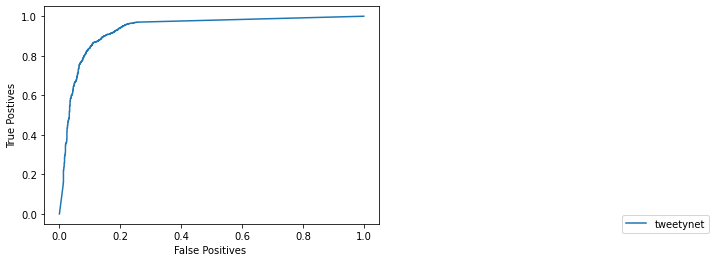

In [42]:
%reload_ext autoreload
generate_ROC_curves(automated_df_tweety, manual_df, chunk_length = 3, label="tweetynet")

1
20
target 1
confidence 1
automated df 1
5
7
target 6
confidence 6
automated df 6
5
25
target 3
confidence 3
automated df 3
25
11


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 14
confidence 14
automated df 14
2
1
target 1
confidence 1
automated df 1
16
6
target 14
confidence 14
automated df 14
3
1


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 5
confidence 5
automated df 5
8
30
target 9
confidence 9
automated df 9
44
43


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
14
15
target 9
confidence 9
automated df 9
15
16
target 7
confidence 7
automated df 7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

10
3
target 2
confidence 2
automated df 2
14
13
target 5
confidence 5
automated df 5
8
18
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

 6
confidence 6
automated df 6
12
13
target 4
confidence 4
automated df 4
5
5
target 17
confidence 17
automated df 17
5
5
target 3
confidence 3
automated df 3
14
11
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

 10
confidence 10
automated df 10
42
50
target 13
confidence 13
automated df 13
28
17


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
1
6
target 2
confidence 2
automated df 2
35
23


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 20
confidence 20
automated df 20
10
8
target 7
confidence 7
automated df 7
14
13


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 20
confidence 20
automated df 20
97
15
target 29
confidence 29
automated df 29
7
7
target 2
confidence 2
automated df 2
6
4
target 7
confidence 7
automated df 7
26
15


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 22
confidence 22
automated df 22
15
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
12
38
target 14
confidence 14
automated df 14


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


23
36
target 7
confidence 7
automated df 7
12
11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 16
confidence 16
automated df 16
9
4
target 4
confidence 4
automated df 4
16
24


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 19
confidence 19
automated df 19
15
19
target 6
confidence 6
automated df 6
25
47


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 19
confidence 19
automated df 19
17
9
target 8
confidence 8
automated df 8
14
16
target 4
confidence 4
automated df 4
27
15


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 9
confidence 9
automated df 9
4
11
target 6
confidence 6
automated df 6
24
14
target 9
confidence 9
automated df 9
20
18
target 14
confidence 14
automated df 14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


21
50


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 21
confidence 21
automated df 21
25
25


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 44
confidence 44
automated df 44
5
5
target 6
confidence 6
automated df 6
21
12


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 29
confidence 29
automated df 29
13
5
target 13
confidence 13
automated df 13
18
7
target 20
confidence 20
automated df 20
4
2
target 4
confidence 4
automated df 4
4
3
target 2
confidence 2
automated df 2
28
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 13
confidence 13
automated df 13
8
10
target 12
confidence 12
automated df 12
15
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 7
confidence 7
automated df 7
6
1
target 5
confidence 5
automated df 5
58
57


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 32
confidence 32
automated df 32
32
11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A va

target 19
confidence 19
automated df 19
9
3
target 3
confidence 3
automated df 3
10
6
target 9
confidence 9
automated df 9
38
68


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 20
confidence 20
automated df 20
17
17
target 8
confidence 8
automated df 8
5
5
target 4
confidence 4
automated df 4
34
44


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 10
confidence 10
automated df 10
42
40


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 29
confidence 29
automated df 29
3
2
target 5
confidence 5
automated df 5
27
25


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 27
confidence 27
automated df 27
21
19


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 21
confidence 21
automated df 21
8
6
target 17
confidence 17
automated df 17
10
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 26
confidence 26
automated df 26
16
5
target 10
confidence 10
automated df 10
26
41


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
3
3
target 15
confidence 15
automated df 15
14
27


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
4
4
target 3
confidence 3
automated df 3
26
24
target 11
confidence 11
automated df 11
7
19


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 6
confidence 6
automated df 6
8
3
target 3
confidence 3
automated df 3
4
2


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
12
9
target 7
confidence 7
automated df 7
6
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 9
confidence 9
automated df 9
10
9
target 11
confidence 11
automated df 11
5
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 7
confidence 7
automated df 7
5
4
target 4
confidence 4
automated df 4
52
46


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
31
32
target 10
confidence 10
automated df 10
10
11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 10
confidence 10
automated df 10
7
1
target 2
confidence 2
automated df 2
47
33


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 25
confidence 25
automated df 25
93
91


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 26
confidence 26
automated df 26
15
6
target 3
confidence 3
automated df 3
6
4
target 5
confidence 5
automated df 5
8
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 27
confidence 27
automated df 27
27
23
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


 13
confidence 13
automated df 13
22
17
target 27
confidence 27
automated df 27
39
85
target 11
confidence 11
automated df 11
12
10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 6
confidence 6
automated df 6
30
31
target 16
confidence 16
automated df 16
12
11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 2
confidence 2
automated df 2
17
15
target 13
confidence 13
automated df 13
10
14
target 1
confidence 1
automated df 1
11

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)



10
target 5
confidence 5
automated df 5
25
10
target 17
confidence 17
automated df 17


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


20
17
target 16
confidence 16
automated df 16
5
4
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


 4
confidence 4
automated df 4
11
7
target 14
confidence 14
automated df 14
21
19
target 14
confidence 14
automated df 14
9
6
target 4
confidence 4
automated df 4
18
17
target 10
confidence 10
automated df 10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


25
15
target 13
confidence 13
automated df 13
12
11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 13
confidence 13
automated df 13
13
12
target 8
confidence 8
automated df 8
9
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 8
confidence 8
automated df 8
8
10
target 3
confidence 3
automated df 3
10
5


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
19
13
target 7
confidence 7
automated df 7
38
16


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
73
78


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 40
confidence 40
automated df 40
22
16
target 13
confidence 13
automated df 13
5
4


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A va

target 18
confidence 18
automated df 18
11
6
target 18
confidence 18
automated df 18


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


2
2
target 6
confidence 6
automated df 6
9
5
target 7
confidence 7
automated df 7
5
5
target 7
confidence 7
automated df 7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


54
7
target 51
confidence 51
automated df 51
3
1
target 3
confidence 3
automated df 3
13
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 23
confidence 23
automated df 23
3
3
target 9
confidence 9
automated df 9
3
6
target 1
confidence 1
automated df 1
22
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 5
confidence 5
automated df 5
4
10
target 5
confidence 5
automated df 5
6
3
target 3
confidence 3
automated df 3
5
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 6
confidence 6
automated df 6
12
9
target 8
confidence 8
automated df 8
2
1
target 3
confidence 3
automated df 3
3
3
target 2
confidence 2
automated df 2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

7
5
target 15
confidence 15
automated df 15
46
17


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
21
12
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

 17
confidence 17
automated df 17
1
4
target 1
confidence 1
automated df 1
4
2
target 5
confidence 5
automated df 5
5
5
target 11
confidence 11
automated df 11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


15
21
target 6
confidence 6
automated df 6
28
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
13
3
target 12
confidence 12
automated df 12
18
24


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 9
confidence 9
automated df 9
45
18
target 37
confidence 37
automated df 37
5
3
target 5
confidence 5
automated df 5
30
26


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 17
confidence 17
automated df 17
20
11
target 17
confidence 17
automated df 17
7

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]



7
target 6
confidence 6
automated df 6
11
14
target 5
confidence 5
automated df 5
28
28


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 37
confidence 37
automated df 37
7
8
target 2
confidence 2
automated df 2
29
22


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
2
2
target 9
confidence 9
automated df 9
1
2
target 1
confidence 1
automated df 1
17
17


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 11
confidence 11
automated df 11
45
48
target 10
confidence 10
automated df 10
72
55


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 66
confidence 66
automated df 66
12
10
target 12
confidence 12
automated df 12
19
24


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 24
confidence 24
automated df 24
5
3
target 7
confidence 7
automated df 7
22
15
target 17
confidence 17
automated df 17
61
52


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 23
confidence 23
automated df 23
19
26
target 12
confidence 12
automated df 12
9
9
target 8
confidence 8
automated df 8
10
8
target 7
confidence 7
automated df 7


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


10
13
target 5
confidence 5
automated df 5
8
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 12
confidence 12
automated df 12
5
5
target 15
confidence 15
automated df 15
19
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
30
28


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 24
confidence 24
automated df 24
155
143
target 54
confidence 54
automated df 54
15
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
31
3
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


 21
confidence 21
automated df 21
7
7
target 13
confidence 13
automated df 13
8
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
14
21
target 19
confidence 19
automated df 19
20
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 35
confidence 35
automated df 35
67
38
target 55
confidence 55
automated df 55
19
16
target 20
confidence 20
automated df 20
7
6
target 5
confidence 5
automated df 5
9
7


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 12
confidence 12
automated df 12
22
25
target 14
confidence 14
automated df 14
10
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 4
confidence 4
automated df 4
15
23


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 26
confidence 26
automated df 26
1
1
target 1
confidence 1
automated df 1
3
2
target 6
confidence 6
automated df 6
5
3
target 4
confidence 4
automated df 4
3
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 1
confidence 1
automated df 1
20
26
target 4
confidence 4
automated df 4
39
29


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
42
26


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
27
5
target 12
confidence 12
automated df 12
2
1
target 1
confidence 1
automated df 1
34
32


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 31
confidence 31
automated df 31
19
102


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
26
20
target 31
confidence 31
automated df 31
28
27
target 19
confidence 19
automated df 19
2
3
target 1
confidence 1
automated df 1
7
3
target 12
confidence 12
automated df 12
14
12


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 4
confidence 4
automated df 4
39
10
target 19
confidence 19
automated df 19


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


16
13
target 19
confidence 19
automated df 19
19
19


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 12
confidence 12
automated df 12
5
4
target 10
confidence 10
automated df 10
4
4
target 2
confidence 2
automated df 2
21
27


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 10
confidence 10
automated df 10
36
32
target 21
confidence 21
automated df 21
40
17


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 25
confidence 25
automated df 25
4
2
target 7
confidence 7
automated df 7
2
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 8
confidence 8
automated df 8
8
3
target 4
confidence 4
automated df 4
68
64


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 33
confidence 33
automated df 33
73
47


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 31
confidence 31
automated df 31
4
63
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


 14
confidence 14
automated df 14
26
25
target 16
confidence 16
automated df 16
59
22


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 84
confidence 84
automated df 84
11
11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 29
confidence 29
automated df 29
10
10
target 11
confidence 11
automated df 11
1
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 8
confidence 8
automated df 8
29
63
target 11
confidence 11
automated df 11
43
22


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 33
confidence 33
automated df 33
208
90


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 72
confidence 72
automated df 72
11
18
target 11
confidence 11
automated df 11
24
19


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
10
2
target 3
confidence 3
automated df 3
10
6
target 5
confidence 5
automated df 5
6
2
target

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

 6
confidence 6
automated df 6
99
72


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 44
confidence 44
automated df 44
7
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 25
confidence 25
automated df 25
7
1
target 5
confidence 5
automated df 5
9
14
target 9
confidence 9
automated df 9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


7
6
target 10
confidence 10
automated df 10
15
11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
15
15
target 17
confidence 17
automated df 17


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


41
37


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 24
confidence 24
automated df 24
56
5
target 15
confidence 15
automated df 15
22
5


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
32
22
target 17
confidence 17
automated df 17


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

5
4
target 2
confidence 2
automated df 2
10
3
target 10
confidence 10
automated df 10
58
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 20
confidence 20
automated df 20
6
2
target 1
confidence 1
automated df 1
46
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 18
confidence 18
automated df 18
1
1
target 1
confidence 1
automated df 1
44
56
target 10
confidence 10
automated df 10
10
9


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
4
4
target 11
confidence 11
automated df 11
10
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 8
confidence 8
automated df 8
2
2
target 2
confidence 2
automated df 2
11
2
target 5
confidence 5
automated df 5
29
30


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
9
3
target 4
confidence 4
automated df 4
2
2
target 5
confidence 5
automated df 5
23
9


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 13
confidence 13
automated df 13
6
7
target 6
confidence 6
automated df 6
3
2
target 2
confidence 2
automated df 2
49
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 27
confidence 27
automated df 27
44
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 31
confidence 31
automated df 31
14
6
target 6
confidence 6
automated df 6
31
27


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 34
confidence 34
automated df 34
8
7
target 7
confidence 7
automated df 7
9
21
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

 6
confidence 6
automated df 6
7
13
target 8
confidence 8
automated df 8
90
33


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 39
confidence 39
automated df 39
9
8
target 13
confidence 13
automated df 13
7
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
100
53


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 182
confidence 182
automated df 182
14
4
target 4
confidence 4
automated df 4
6
3
target 4
confidence 4
automated df 4
3
1
target 2
confidence 2
automated df 2
36
12


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 17
confidence 17
automated df 17
11
11
target 17
confidence 17
automated df 17
20

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]



5
target 13
confidence 13
automated df 13
29
15


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 17
confidence 17
automated df 17
1
2
target 1
confidence 1
automated df 1
14
12
target 16
confidence 16
automated df 16
35
34


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
6
6
target 7
confidence 7
automated df 7
5
3
target 5
confidence 5
automated df 5
2
2


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negati

target 2
confidence 2
automated df 2
10
11
target 2
confidence 2
automated df 2
74
63


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 44
confidence 44
automated df 44
11
8
target 8
confidence 8
automated df 8
26
8


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 8
confidence 8
automated df 8
30
10
target 10
confidence 10
automated df 10
4
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 24
confidence 24
automated df 24
28
27
target 6
confidence 6
automated df 6
6
6
target 6
confidence 6
automated df 6
10

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s


6
target 5
confidence 5
automated df 5
8
8
target 3
confidence 3
automated df 3
3
7
target 1
confidence 1
automated df 1
12
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 10
confidence 10
automated df 10
23
29
target 10
confidence 10
automated df 10
41
33


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 16
confidence 16
automated df 16
24
24


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 47
confidence 47
automated df 47
8
2
target 7
confidence 7
automated df 7
3
3
target 7
confidence 7
automated df 7
2
2
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A va

 2
confidence 2
automated df 2
17
10
target 15
confidence 15
automated df 15
14
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 23
confidence 23
automated df 23
13
2
target 6
confidence 6
automated df 6
12
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A va

target 12
confidence 12
automated df 12
4
4
target 2
confidence 2
automated df 2
11
8
target 12
confidence 12
automated df 12
12
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 19
confidence 19
automated df 19
19
17
target 15
confidence 15
automated df 15
16
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 45
confidence 45
automated df 45
18
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 30
confidence 30
automated df 30
11
6
target 14
confidence 14
automated df 14
7
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
11
11
target 5
confidence 5
automated df 5
11
11
target 6
confidence 6
automated df 6
9
10


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 16
confidence 16
automated df 16
5
7
target 2
confidence 2
automated df 2
4
3
target 3
confidence 3
automated df 3
23
19


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 15
confidence 15
automated df 15
1
2
target 1
confidence 1
automated df 1
5
6
target 3
confidence 3
automated df 3
16
15


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 15
confidence 15
automated df 15
20
13
target 11
confidence 11
automated df 11
17
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
7
7
target 13
confidence 13
automated df 13
63
56


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 24
confidence 24
automated df 24
26
40


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 21
confidence 21
automated df 21
53
50
target 51
confidence 51
automated df 51
16
16
target 7
confidence 7
automated df 7
32
28


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 24
confidence 24
automated df 24
6
9
target 11
confidence 11
automated df 11
21
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
50
46


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 30
confidence 30
automated df 30
17
13
target 5
confidence 5
automated df 5
2
5
target 1
confidence 1
automated df 1
42
5


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 17
confidence 17
automated df 17
28
16
target 19
confidence 19
automated df 19


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


24
10
target 9
confidence 9
automated df 9
49
49
target

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

 7
confidence 7
automated df 7
19
22
target 11
confidence 11
automated df 11
22
24


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 9
confidence 9
automated df 9
25
27
target 9
confidence 9
automated df 9
12
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 27
confidence 27
automated df 27
41
16
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

 15
confidence 15
automated df 15
2
1
target 1
confidence 1
automated df 1
56
41
target 31
confidence 31
automated df 31
9
9
target 4
confidence 4
automated df 4
25
19
target 9
confidence 9
automated df 9
12
98


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 12
confidence 12
automated df 12
135
56


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 36
confidence 36
automated df 36
73
57


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 33
confidence 33
automated df 33
7
8
target 17

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni


confidence 17
automated df 17
6
6
target 7
confidence 7
automated df 7
20
15


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 46
confidence 46
automated df 46
24
8


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 31
confidence 31
automated df 31
3
3
target 5
confidence 5
automated df 5
18
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 45
confidence 45
automated df 45
30
29
target 8
confidence 8
automated df 8
37
99


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 77
confidence 77
automated df 77
4
69
target 10
confidence 10
automated df 10
27
44


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 8
confidence 8
automated df 8
19
10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
32
31


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 16
confidence 16
automated df 16
26
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 18
confidence 18
automated df 18
4
16
target 19
confidence 19
automated df 19
31
38
target 9
confidence 9
automated df 9
24
28


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 20
confidence 20
automated df 20
5
5
target 2
confidence 2
automated df 2
30
19


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 27
confidence 27
automated df 27
2
1
target 9
confidence 9
automated df 9
8
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 8
confidence 8
automated df 8
14
7
target 16
confidence 16
automated df 16
29

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]



33
target 16
confidence 16
automated df 16
18
23
target 9
confidence 9
automated df 9
5
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 15
confidence 15
automated df 15
15
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 39
confidence 39
automated df 39
49
10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
13
9
target 9
confidence 9
automated df 9
3
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 5
confidence 5
automated df 5
17
17
target 7
confidence 7
automated df 7
9
4
target 2
confidence 2
automated df 2
26
18


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 53
confidence 53
automated df 53
17
15
target 9
confidence 9
automated df 9
23
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 28
confidence 28
automated df 28
35
10
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A va

 17
confidence 17
automated df 17
3
3
target 2
confidence 2
automated df 2
4
5
target 4
confidence 4
automated df 4
20
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 11
confidence 11
automated df 11
2
2
target 3
confidence 3
automated df 3
11
10
target 11
confidence 11
automated df 11
4
3
target 3
confidence 3
automated df 3
6
3
target 2
confidence 2
automated df 2
7
4
target 8
confidence 8
automated df 8


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

17
8
target 8
confidence 8
automated df 8
1
1
target 1
confidence 1
automated df 1
22
19


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 10
confidence 10
automated df 10
6
6
target 4
confidence 4
automated df 4
15
13


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 45
confidence 45
automated df 45
8
7
target 3
confidence 3
automated df 3
21
14
target 9
confidence 9
automated df 9
29
37


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 9
confidence 9
automated df 9
36
26
target 15
confidence 15
automated df 15
40
29


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 47
confidence 47
automated df 47
52
50


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 30
confidence 30
automated df 30
5
5
target 4
confidence 4
automated df 4
63
34


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 40
confidence 40
automated df 40
24
26


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
12
6
target 4
confidence 4
automated df 4
3
1
target 4
confidence 4
automated df 4
4
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 10
confidence 10
automated df 10
12
8
target 10
confidence 10
automated df 10
35
24


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 21
confidence 21
automated df 21
24
10
target 19
confidence 19
automated df 19


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


13
8
target 13
confidence 13
automated df 13
5
5
target 5

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni


confidence 5
automated df 5
21
12
target 30
confidence 30
automated df 30
28
25
target 9
confidence 9
automated df 9
7
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 15
confidence 15
automated df 15
8
2
target 5
confidence 5
automated df 5
3
2
target 4
confidence 4
automated df 4
55
37


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 34
confidence 34
automated df 34
50
28
target 40
confidence 40
automated df 40
26
18
target 7
confidence 7
automated df 7
74
21


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 90
confidence 90
automated df 90
132
54


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 101
confidence 101
automated df 101
20
8
target 16
confidence 16
automated df 16
39
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
2
4
target 1
confidence 1
automated df 1
54
48
target 19

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s


confidence 19
automated df 19
38
50
target 14
confidence 14
automated df 14
8
8
target 2
confidence 2
automated df 2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

19
18


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 36
confidence 36
automated df 36
24
22


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 21
confidence 21
automated df 21
55
26


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 24
confidence 24
automated df 24
42
23


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 54
confidence 54
automated df 54
26
17
target 5
confidence 5
automated df 5
13
11
target 7
confidence 7
automated df 7
2
3
target 1
confidence 1
automated df 1
10
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 11
confidence 11
automated df 11
6
2
target 4
confidence 4
automated df 4
9
3
target 22
confidence 22
automated df 22
46
57
target 37
confidence 37
automated df 37
16
2
target 9
confidence 9
automated df 9
15
4


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
28
5
target 13
confidence 13
automated df 13
54
40


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 40
confidence 40
automated df 40
23
20


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 35
confidence 35
automated df 35
34
20


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 21
confidence 21
automated df 21
9
10
target 2
confidence 2
automated df 2
9
9
target 8
confidence 8
automated df 8
8
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 7
confidence 7
automated df 7
5
5
target 2
confidence 2
automated df 2
15
14
target 14
confidence 14
automated df 14
7
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 38
confidence 38
automated df 38
2
2
target 3
confidence 3
automated df 3
25
13
target 8
confidence 8
automated df 8
48
48


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 21
confidence 21
automated df 21
30
29
target 31
confidence 31
automated df 31
7
40
target 9
confidence 9
automated df 9
7
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 19
confidence 19
automated df 19
25
20
target 16
confidence 16
automated df 16
5
1


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 2
confidence 2
automated df 2
59
97


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 47
confidence 47
automated df 47
5
2
target 4
confidence 4
automated df 4
13
16
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

 16
confidence 16
automated df 16
24
5
target 10
confidence 10
automated df 10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


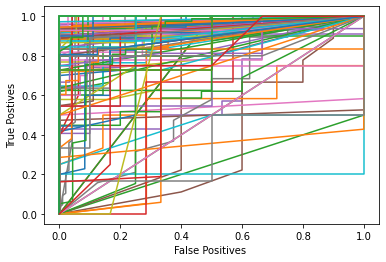

In [48]:
%reload_ext autoreload
generate_ROC_curves_mutliclass(automated_df_tweety, manual_df, label="", chunk_length=3)

# Mircofaune

In [17]:
isolation_parameters_micro = {
    "model" : "microfaune",
    "technique" : "chunk",
    "threshold_type" : "median",
    "threshold_const" : 4.0,
    "threshold_min" : 0.25,
    "window_size" : 2.0,
    "chunk_size" : 3.0
}

In [18]:
automated_df_micro = generate_automated_labels(path,isolation_parameters_micro);
automated_df_micro

1/1 [==============================] - 0s 220ms/step


1/1 [==============================] - 0s 97ms/step
Failed to load mels_test.pkl
Failed to load mel_dataset.pkl
1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 304ms/step


1/1 [==============================] - 0s 317ms/step


,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,OFFSET,DURATION,MANUAL ID,CONFIDENCE
0,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Agelasticus-xanthophthalmus-20921.wav,0,38.347755,44100,3.0,3.000000,bird,0.897244
1,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Agelasticus-xanthophthalmus-20921.wav,0,38.347755,44100,15.0,3.000000,bird,1.000000
2,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Agelasticus-xanthophthalmus-20921.wav,0,38.347755,44100,27.0,3.000000,bird,0.824040
3,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Agelasticus-xanthophthalmus-218235.wav,0,7.415986,44100,6.0,1.415986,bird,1.000000
4,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Akletos-goeldii-73873.wav,0,42.788571,44100,0.0,3.000000,bird,0.959465
...,...,...,...,...,...,...,...,...,...
2961,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zenaida-auriculata-77090.wav,0,48.901224,44100,12.0,3.000000,bird,0.958259
2962,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zenaida-auriculata-77090.wav,0,48.901224,44100,15.0,3.000000,bird,0.916211
2963,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zenaida-auriculata-77090.wav,0,48.901224,44100,24.0,3.000000,bird,0.882458
2964,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zenaida-auriculata-77090.wav,0,48.901224,44100,27.0,3.000000,bird,0.923375


In [19]:
automated_df_micro = apply_weak_labels(automated_df_micro)

In [20]:
clip_stat_df_micro = clip_statistics(automated_df_micro, manual_df,stats_type = "general", threshold = 0.5)
clip_stat_df_micro


Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calc

,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Agelasticus-xanthophthalmus-20921.wav,Agelasticus xanthophthalmus Pale-eyed Blackbird,5.189388,3.810612,0.940204,28.407551,9.940204,0.576599,0.846612,0.685992,0.522060
1,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Agelasticus-xanthophthalmus-218235.wav,Agelasticus xanthophthalmus Pale-eyed Blackbird,0.000000,1.415986,2.444898,3.555102,3.860884,0.000000,0.000000,0.000000,0.000000
2,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Akletos-goeldii-73873.wav,Akletos goeldii Goeldi's Antbird,9.099705,15.688866,3.759909,14.240091,28.548481,0.367093,0.707619,0.483407,0.318746
3,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Amazilia-viridicauda-91952.wav,Amazilia viridicauda Green-and-white Hummingbird,13.001701,22.603197,0.000000,0.000000,35.604898,0.365166,1.000000,0.534977,0.365166
4,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Amazona-ochrocephala-91561.wav,Amazona ochrocephala Yellow-crowned Amazon,9.618889,12.297846,0.000000,0.000000,21.916735,0.438883,1.000000,0.610033,0.438883
...,...,...,...,...,...,...,...,...,...,...,...,...
416,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Xenops-minutus-282029.wav,Xenops minutus Plain Xenops,9.708481,17.291519,0.340204,2.256531,27.340204,0.359573,0.966144,0.524093,0.355099
417,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Xenops-tenuirostris-39438.wav,Xenops tenuirostris Slender-billed Xenops,1.593696,6.566304,0.000000,0.000000,8.160000,0.195306,1.000000,0.326788,0.195306
418,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Xiphocolaptes-promeropirhynchus-47978.wav,Xiphocolaptes promeropirhynchus Strong-billed ...,10.675306,37.324694,5.604195,4.643787,53.604195,0.222402,0.655751,0.332153,0.199151
419,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Xiphocolaptes-promeropirhynchus-91223.wav,Xiphocolaptes promeropirhynchus Strong-billed ...,13.763719,15.757098,6.756599,14.243401,36.277415,0.466238,0.670736,0.550096,0.379402


In [21]:
class_statistics(clip_stat_df_micro)

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\statistics.py:628: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)


,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,Agelasticus xanthophthalmus Pale-eyed Blackbird,5.189388,3.385102,5.226599,0.4982,0.6052,0.5465
1,Akletos goeldii Goeldi's Antbird,9.099705,3.759909,15.688866,0.3671,0.7076,0.4834
2,Amazilia viridicauda Green-and-white Hummingbird,13.001701,0.000000,22.603197,0.3652,1.0000,0.5350
3,Amazona ochrocephala Yellow-crowned Amazon,9.618889,0.000000,12.297846,0.4389,1.0000,0.6100
4,Amazonetta brasiliensis Brazilian Teal,0.591995,0.230816,2.408005,0.1973,0.7195,0.3097
...,...,...,...,...,...,...,...
346,Xenopipo atronitens Black Manakin,2.650499,1.446190,21.349501,0.1104,0.6470,0.1887
347,Xenops minutus Plain Xenops,17.579660,0.340204,32.172993,0.3533,0.9810,0.5196
348,Xenops tenuirostris Slender-billed Xenops,1.593696,0.000000,6.566304,0.1953,1.0000,0.3268
349,Xiphocolaptes promeropirhynchus Strong-billed ...,24.439025,12.360794,53.081791,0.3153,0.6641,0.4276


In [22]:
global_dataset_statistics(clip_stat_df_micro)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.415481,0.578801,0.483728,0.319024


2966
5816


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 5396
confidence 5396
automated df 5396


0.6083299445262257

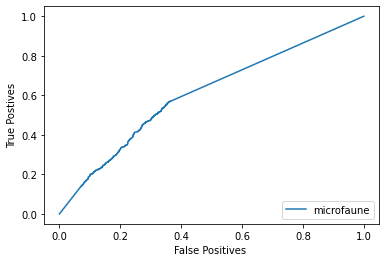

In [23]:
generate_ROC_curves(automated_df_micro, manual_df, chunk_length = 3, label="microfaune")

4
11
target 14
confidence 14
automated df 14
9
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
12
43
target 11
confidence 11
automated df 11
8
16
target 7
confidence 7
automated df 7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

1
3
target 2
confidence 2
automated df 2
2
13
target 5
confidence 5
automated df 5
2
2
target 5
confidence 5
automated df 5
4
13
target 4

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni


confidence 4
automated df 4
16
5
target 17
confidence 17
automated df 17
8
11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 10
confidence 10
automated df 10
7
17
target 14
confidence 14
automated df 14
1
6
target 2
confidence 2
automated df 2
2
23


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 20
confidence 20
automated df 20
1
8
target 7
confidence 7
automated df 7
16
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 20
confidence 20
automated df 20
1
15
target 29
confidence 29
automated df 29
3
4
target 7
confidence 7
automated df 7
1
15


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
1
13
target 16
confidence 16
automated df 16
12
38


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
6
36
target 7
confidence 7
automated df 7
16
11


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 16
confidence 16
automated df 16
3
4
target 4
confidence 4
automated df 4
8
21
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

 15
confidence 15
automated df 15
2
19
target 6
confidence 6
automated df 6
3
47


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 19
confidence 19
automated df 19
5
16
target 4
confidence 4
automated df 4
1
14
target 9
confidence 9
automated df 9
15
18


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 14
confidence 14
automated df 14
16
50
target 21
confidence 21
automated df 21


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


5
25


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 44
confidence 44
automated df 44
2
5
target 6
confidence 6
automated df 6
5
6
target 12
confidence 12
automated df 12


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

11
4
target 12
confidence 12
automated df 12
17
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
6
9
target 12
confidence 12
automated df 12
5
6
target 4
confidence 4
automated df 4
7
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A va

target 7
confidence 7
automated df 7
6
55


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 30
confidence 30
automated df 30
1
3
target 3
confidence 3
automated df 3
1
6
target 9
confidence 9
automated df 9
3
59


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 15
confidence 15
automated df 15
7
17
target 8
confidence 8
automated df 8
1
3
target 3
confidence 3
automated df 3
5
44


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 10
confidence 10
automated df 10
29
40


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 29
confidence 29
automated df 29
1
20
target 16
confidence 16
automated df 16
11
19


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 21
confidence 21
automated df 21
4
7
target 26
confidence 26
automated df 26


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


9
5
target 10
confidence 10
automated df 10
9
41
target 14

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]



confidence 14
automated df 14
8
3
target 15
confidence 15
automated df 15
9
27


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A va

target 9
confidence 9
automated df 9
3
2
target 3
confidence 3
automated df 3
4
3
target 3
confidence 3
automated df 3
1
2


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 16
confidence 16
automated df 16
5
4
target 4
confidence 4
automated df 4
8
6
target 9
confidence 9
automated df 9
5
9


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 11
confidence 11
automated df 11
5
5
target 7
confidence 7
automated df 7
1
4
target 4
confidence 4
automated df 4
4
45


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 15
confidence 15
automated df 15
5
11
target 10
confidence 10
automated df 10
1
1
target 2
confidence 2
automated df 2
4
4
target

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

 5
confidence 5
automated df 5
22
5
target

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


 23
confidence 23
automated df 23
2
23
target 13
confidence 13
automated df 13
14
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 18
confidence 18
automated df 18
5
10
target 6
confidence 6
automated df 6
11
31


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 16
confidence 16
automated df 16
2
11
target 2
confidence 2
automated df 2
2
15
target 13
confidence 13
automated df 13
1
14
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

 1
confidence 1
automated df 1
5
10
target 5
confidence 5
automated df 5
10
10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 17
confidence 17
automated df 17
1
11
target 8
confidence 8
automated df 8
3
4
target 4
confidence 4
automated df 4
8
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
2
17
target 10
confidence 10
automated df 10
13
15


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 13
confidence 13
automated df 13
2
12
target 8
confidence 8
automated df 8
3
5
target 8
confidence 8
automated df 8
7

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s


5
target 15
confidence 15
automated df 15
13
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 19
confidence 19
automated df 19
33
78


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 40
confidence 40
automated df 40
16
6
target 18
confidence 18
automated df 18
1
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
1
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A va

target 18
confidence 18
automated df 18
4
3
target 9
confidence 9
automated df 9
2
6
target 1
confidence 1
automated df 1
5
6
target 5
confidence 5
automated df 5
4
3
target 3
confidence 3
automated df 3
6
3
target 6
confidence 6
automated df 6
6
9
target 8
confidence

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

 8
automated df 8
14
5
target 15
confidence 15
automated df 15
10
17


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
1
3
target 2
confidence 2
automated df 2
1
4
target 1
confidence 1
automated df 1
6
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 19
confidence 19
automated df 19
6
3
target 12
confidence 12
automated df 12
8
24
target 9
confidence 9
automated df 9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

15
18
target 37
confidence 37
automated df 37
6
3
target 5
confidence 5
automated df 5
12
21
target 13

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni


confidence 13
automated df 13
1
2
target 5
confidence 5
automated df 5
5
14
target 5
confidence 5
automated df 5
19
28


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 37
confidence 37
automated df 37
11
22
target 17
confidence 17
automated df 17
2
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A va

target 9
confidence 9
automated df 9
1
2
target 1
confidence 1
automated df 1
11
17
target 11
confidence 11
automated df 11
63
55


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 66
confidence 66
automated df 66
5
3
target 7
confidence 7
automated df 7
6
7
target 11
confidence 11
automated df 11


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


6
26
target 12
confidence 12
automated df 12
2
9
target 8
confidence 8
automated df 8
6
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 5
confidence 5
automated df 5
11
2
target 12
confidence 12
automated df 12
5
5


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 15
confidence 15
automated df 15
14
14
target 18
confidence 18
automated df 18


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


21
28


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 24
confidence 24
automated df 24
15
143
target 54
confidence 54
automated df 54
8
13
target 18
confidence 18
automated df 18
10
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 21
confidence 21
automated df 21
12
7
target 18
confidence 18
automated df 18
18

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]



21
target 19
confidence 19
automated df 19


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


9
6
target 35
confidence 35
automated df 35
35
38
target 55
confidence 55
automated df 55
1
16
target 20
confidence 20
automated df 20


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

4
6
target 5
confidence 5
automated df 5
9
7
target 12
confidence 12
automated df 12
12
25
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

 14
confidence 14
automated df 14
1
14
target 4
confidence 4
automated df 4
23
23


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 26
confidence 26
automated df 26
1
3
target 4
confidence 4
automated df 4
5
26
target 4
confidence 4
automated df 4
6
29


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 16
confidence 16
automated df 16
18
26


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
13
5
target 12
confidence 12
automated df 12
11
28


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 26
confidence 26
automated df 26
11
102


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
9
10
target 15
confidence 15
automated df 15
15
27


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
8
10
target 19
confidence 19
automated df 19
4
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
8
12
target 7
confidence 7
automated df 7
2
4
target 2
confidence 2
automated df 2
3
27


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 10
confidence 10
automated df 10
7
6
target 7
confidence 7
automated df 7
3
17


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 25
confidence 25
automated df 25
1
2
target 7
confidence 7
automated df 7
6
1
target 7
confidence 7
automated df 7
8
64


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A va

target 33
confidence 33
automated df 33
17
47


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 31
confidence 31
automated df 31
10
25
target 16
confidence 16
automated df 16
36
22


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 84
confidence 84
automated df 84
25
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 25
confidence 25
automated df 25
9
10
target 11
confidence 11
automated df 11
4
2
target

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

 8
confidence 8
automated df 8
11
63
target 11
confidence 11
automated df 11
21
22


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 33
confidence 33
automated df 33
2
90


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 72
confidence 72
automated df 72
4
18
target 11
confidence 11
automated df 11
13
19


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
1
2
target 3
confidence 3
automated df 3
2
6
target 5
confidence 5
automated df 5
6
2
target 6
confidence 6
automated df 6
39
53


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 37
confidence 37
automated df 37
8
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 25
confidence 25
automated df 25
6
1
target 5
confidence 5
automated df 5
8
14
target 9
confidence 9
automated df 9
20
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
3
15
target 17
confidence 17
automated df 17
19
37


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 24
confidence 24
automated df 24
5
5
target 17
confidence 17
automated df 17
1
19


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 10
confidence 10
automated df 10
18
6
target 20
confidence 20
automated df 20
2
2
target 1
confidence 1
automated df 1
14
5
target 18
confidence 18
automated df 18


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

1
1
target 1
confidence 1
automated df 1
4
56
target 10
confidence 10
automated df 10
15
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 22
confidence 22
automated df 22
3
4
target 11
confidence 11
automated df 11
7
6
target 8
confidence 8
automated df 8
4
2
target 5
confidence 5
automated df 5
4
30
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A va

 15
confidence 15
automated df 15
5
2
target 5
confidence 5
automated df 5
5
9
target 13
confidence 13


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

automated df 13
3
7
target 17
confidence 17
automated df 17
1
9
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

 3
confidence 3
automated df 3
3
2
target 3
confidence 3
automated df 3
25
33
target 39
confidence 39
automated df 39
3
8
target 13
confidence 13
automated df 13
1
3
target 4
confidence 4
automated df 4
6
12


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 17
confidence 17
automated df 17
16
11
target 17
confidence 17
automated df 17


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

2
5
target 13
confidence 13
automated df 13
13
15


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
2
2
target 1
confidence 1
automated df 1
7
10
target 11
confidence 11
automated df 11
7
34


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 22
confidence 22
automated df 22
2
6
target 7
confidence 7
automated df 7
31
63


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 44
confidence 44
automated df 44
5
8
target 8
confidence 8
automated df 8
4
8
target 8
confidence 8
automated df 8
10
10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 10
confidence 10
automated df 10
10
5


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 24
confidence 24
automated df 24
4
6
target 6
confidence 6
automated df 6
1
6
target 5
confidence 5
automated df 5
4
8
target 3
confidence 3
automated df 3
9

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s


9
target 10
confidence 10
automated df 10
10
29


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 10
confidence 10
automated df 10
11
24


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 47
confidence 47
automated df 47
1
2
target 7
confidence 7
automated df 7
4
3
target 7
confidence 7
automated df 7
5
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A va

target 8
confidence 8
automated df 8
20
9
target 23
confidence 23
automated df 23


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


3
2
target 6
confidence 6
automated df 6
9
8


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 12
confidence 12
automated df 12
8
6
target 19
confidence 19
automated df 19
6
12


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 5
confidence 5
automated df 5
5
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 45
confidence 45
automated df 45
10
4
target 24
confidence 24
automated df 24


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


4
6
target 14
confidence 14
automated df 14
16
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
2
10
target 16
confidence 16
automated df 16
2
7
target 2
confidence 2
automated df 2
4
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 3
confidence 3
automated df 3
13
18
target 13
confidence 13
automated df 13
2
2
target 1
confidence 1
automated df 1
1
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 3
confidence 3
automated df 3
1
15
target 15
confidence 15
automated df 15
7
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
3
16
target 7
confidence 7
automated df 7
20
56


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 24
confidence 24
automated df 24
3
40
target 21
confidence 21
automated df 21
49
50
target 51
confidence 51
automated df 51
8
16
target 7
confidence 7
automated df 7
22
28


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 24
confidence 24
automated df 24
1
9
target 11
confidence 11
automated df 11
1
14
target 11
confidence 11
automated df 11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

9
41
target 12
confidence 12
automated df 12
6
13
target 5
confidence 5
automated df 5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

1
5
target 1
confidence 1
automated df 1
1
5
target 17
confidence 17
automated df 17
12
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
10
24
target 9
confidence 9
automated df 9
4
27
target 9
confidence 9
automated df 9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

10
16
target 15
confidence 15
automated df 15
1
1


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 1
confidence 1
automated df 1
26
41
target 31
confidence 31
automated df 31
3
9
target 6
confidence 6
automated df 6
8
98
target 12
confidence 12
automated df 12
12

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni


56


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 36
confidence 36
automated df 36
9
57


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 33
confidence 33
automated df 33
11
8
target 17
confidence 17
automated df 17
6
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 7
confidence 7
automated df 7
5
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 28
confidence 28
automated df 28
28
8


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 31
confidence 31
automated df 31
3
3
target 5
confidence 5
automated df 5
13
15


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 44
confidence 44
automated df 44
9
29
target 8
confidence 8
automated df 8
4
94


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 58
confidence 58
automated df 58
9
69
target 10
confidence 10
automated df 10
6
44
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

 8
confidence 8
automated df 8
9
6
target 8
confidence 8
automated df 8
16
31


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 16
confidence 16
automated df 16
3
14
target 18
confidence 18
automated df 18
21
28


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 20
confidence 20
automated df 20
15
19


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 27
confidence 27
automated df 27
1
3
target 8
confidence 8
automated df 8
4
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
11
33
target 16
confidence 16
automated df 16
10
23


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 9
confidence 9
automated df 9
10
5
target 15
confidence 15
automated df 15
31
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 39
confidence 39
automated df 39
13
5
target 12
confidence 12
automated df 12
7
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A va

target 9
confidence 9
automated df 9
2
3
target 5
confidence 5
automated df 5
4
8
target 3
confidence 3
automated df 3
1
4
target 2
confidence 2
automated df 2
28
18


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 53
confidence 53
automated df 53
5
15
target 9
confidence 9
automated df 9
23
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 28
confidence 28
automated df 28
5
2
target 5
confidence 5
automated df 5
1
3
target 2
confidence 2
automated df 2
5
5
target 4
confidence 4
automated df 4
3
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 11
confidence 11
automated df 11
1
2
target 3
confidence 3
automated df 3
1
3
target 2
confidence 2
automated df 2
6
4
target 8
confidence 8
automated df 8
8
8


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 8
confidence 8
automated df 8
1
1
target 1
confidence 1
automated df 1
6
19
target 10
confidence 10
automated df 10
3
6
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

 4
confidence 4
automated df 4
2
13
target 45
confidence 45
automated df 45
2
7
target 3
confidence 3
automated df 3
1
11
target 7
confidence 7
automated df 7
4
14
target 3
confidence 3
automated df 3
13
26


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 15
confidence 15
automated df 15
42
29


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 47
confidence 47
automated df 47
17
12
target 18
confidence 18
automated df 18
1
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 4
confidence 4
automated df 4
36
34


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 40
confidence 40
automated df 40
4
26
target 20
confidence 20
automated df 20
1
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 4
confidence 4
automated df 4
2
3
target 10
confidence 10
automated df 10
9
8
target 10
confidence 10
automated df 10
16
24
target 21
confidence 21
automated df 21
3
10
target 19
confidence 19
automated df 19
4
12


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 30
confidence 30
automated df 30
5
21
target 8
confidence 8
automated df 8
16
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 15
confidence 15
automated df 15
5
2
target 5
confidence 5
automated df 5
5
2
target 4
confidence 4
automated df 4
31
37


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 34
confidence 34
automated df 34
3
5
target 16
confidence 16
automated df 16
18
21


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 90
confidence 90
automated df 90
18
51


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 90
confidence 90
automated df 90
13
8
target 16
confidence 16
automated df 16
4
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 22
confidence 22
automated df 22
1
48
target 19
confidence 19
automated df 19
4
50
target 14
confidence 14
automated df 14
1
8
target 2
confidence 2
automated df 2
8
18


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 36
confidence 36
automated df 36
5
22


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 21
confidence 21
automated df 21
14
26


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 24
confidence 24
automated df 24
5
23


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 54
confidence 54
automated df 54
2
3
target 1
confidence 1
automated df 1
10
6
target 11
confidence 11
automated df 11
14
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 22
confidence 22
automated df 22
26
57
target 37
confidence 37
automated df 37
5
2
target 9
confidence 9
automated df 9
7
4


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
9
5
target 13
confidence 13
automated df 13
30
40


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 40
confidence 40
automated df 40
20
20


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 35
confidence 35
automated df 35
19
20


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 21
confidence 21
automated df 21
1
10
target 2
confidence 2
automated df 2
4
9
target 8
confidence 8
automated df 8
2
2
target 7
confidence 7
automated df 7
9
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A va

target 14
confidence 14
automated df 14
1
2
target 3
confidence 3
automated df 3
1
13
target 8
confidence 8
automated df 8
22
48


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 21
confidence 21
automated df 21
16
29


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 31
confidence 31
automated df 31
8
3
target 10
confidence 10
automated df 10
17
20


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
3
1
target 2
confidence 2
automated df 2
26
57


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 35
confidence 35
automated df 35
7
16
target 16
confidence 16
automated df 16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


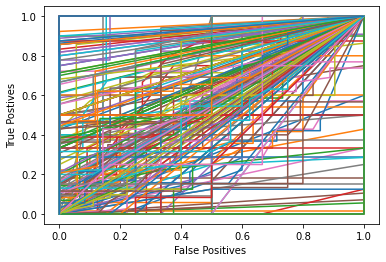

In [49]:
generate_ROC_curves_mutliclass(automated_df_micro, manual_df, label="", chunk_length=3)

# Birdnet

In [25]:
isolation_parameters_birdnet = {
   "model" : "birdnet",
   "output_path" : "outputs",
   "filetype" : "wav", 
   "num_predictions" : 1,
   "write_to_csv" : True
}

In [77]:
automated_df_birdnet = generate_automated_labels(path,isolation_parameters_birdnet);

LOADING TF LITE MODEL... DONE!
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 1 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... DONE! READ 14 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 14 RESULTS.
READING AUDIO DATA... DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 12 

READING AUDIO DATA... DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... DONE! READ 30 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.0 SECONDS
DONE! WROTE 30 RESULTS.
READING AUDIO DATA... DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... 

ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.3 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.3 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... DONE! READ 33 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.3 SECONDS
DONE! WROTE 33 RESULTS.
READING AUDIO DATA... DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... DONE! READ 23 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.6 SECONDS
DONE! WROTE 23 RESULTS.
READING AUDIO DATA... DONE! READ 10 CHUNKS.
ANALYZING AUDIO...

ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... DONE! READ 14 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 14 RESULTS.
READING AUDIO DATA... DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... DONE! READ 26 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.8 SECONDS
DONE! WROTE 26 RESULTS.
READING AUDIO DATA... DONE! READ 1 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... DONE! READ 1 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE!

ANALYZING AUDIO... DONE! Time 1.7 SECONDS
DONE! WROTE 24 RESULTS.
READING AUDIO DATA... DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.4 SECONDS
DONE! WROTE 20 RESULTS.
READING AUDIO DATA... DONE! READ 1 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... DONE! READ 18 CHUNKS.
ANALYZING AUDIO.

READING AUDIO DATA... DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... DONE! READ 15 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 15 RESULTS.
READING AUDIO DATA... DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... DONE! READ 19 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 19 RESULTS.
READING AUDIO DATA..

READING AUDIO DATA... DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 4.3 SECONDS
DONE! WROTE 20 RESULTS.
READING AUDIO DATA... DONE! READ 55 CHUNKS.
ANALYZING AUDIO... DONE! Time 11.9 SECONDS
DONE! WROTE 55 RESULTS.
READING AUDIO DATA... DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.3 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.5 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.9 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... DONE! READ 14 CHUNKS.
ANALYZING AUDIO... DONE! Time 3.1 SECONDS
DONE! WROTE 14 RESULTS.
READING AUDIO DATA... DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 3.4 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DAT

ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.7 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 4.3 SECONDS
DONE! WROTE 20 RESULTS.
READING AUDIO DATA... DONE! READ 14 CHUNKS.
ANALYZING AUDIO... DONE! Time 3.1 SECONDS
DONE! WROTE 14 RESULTS.
READING AUDIO DATA... DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.3 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... DONE! READ 30 CHUNKS.
ANALYZING AUDIO... DONE! Time 6.6 SECONDS
DONE! WROTE 30 RESULTS.
READING AUDIO DATA... DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DO

ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 3.6 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... DONE! READ 10 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.2 SECONDS
DONE! WROTE 10 RESULTS.
WRITING RESULTS TO C:\Users\Siloux\Desktop\E4E\PyHa\outputs\result.csv ... 

In [78]:
species_to_code = pd.read_csv("./BirdCLEF2020_Validation_Audio_and_Ground_Truth/birdnet_species_to_code.csv").set_index("species")

In [79]:
def birdnet_species_to_code(species):
    try:
        return species_to_code.loc[species]["code"]
    except:
        return ""

In [80]:
#For other files
#automated_df_birdnet_test = automated_df_birdnet
#automated_df_birdnet_test["MANUAL ID"] = automated_df_birdnet["MANUAL ID"].apply(birdnet_species_to_code)
#automated_df_birdnet_test = automated_df_birdnet_test[automated_df_birdnet_test["MANUAL ID"] != ""]

In [81]:
automated_df_birdnet

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Accipiter-bicolor-451839.wav,5.668583,0,0.0,3.0,48000,Accipiter bicolor,0.999015
1,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Accipiter-bicolor-451839.wav,5.668583,0,3.0,3.0,48000,Accipiter bicolor,0.998758
2,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Aeronautes-montivagus-257782.wav,20.689000,0,0.0,3.0,48000,Aeronautes montivagus,0.647447
3,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Aeronautes-montivagus-257782.wav,20.689000,0,3.0,3.0,48000,Aeronautes montivagus,0.552830
4,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Aeronautes-montivagus-257782.wav,20.689000,0,6.0,3.0,48000,Asthenes hudsoni,0.678411
...,...,...,...,...,...,...,...,...,...
7260,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Zimmerius-bolivianus-232569.wav,31.032000,0,15.0,3.0,48000,Elminia longicauda,0.127141
7261,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Zimmerius-bolivianus-232569.wav,31.032000,0,18.0,3.0,48000,Campephaga quiscalina,0.631022
7262,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Zimmerius-bolivianus-232569.wav,31.032000,0,21.0,3.0,48000,Elminia longicauda,0.174210
7263,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Zimmerius-bolivianus-232569.wav,31.032000,0,24.0,3.0,48000,Myiothlypis conspicillata,0.061342


In [83]:
def mixed_bird_fix(manual_id):
    id_arr = manual_id.split(" ")
    return id_arr[0] + " " +  id_arr[1]

#weak_label["MANUAL ID"] = weak_label["MANUAL ID"].apply(mixed_bird_fix)
weak_label["BIRDNET ID"] = weak_label["MANUAL ID"].apply(mixed_bird_fix)
weak_label = weak_label.groupby(by="BIRDNET ID").max()
weak_label



,MANUAL ID,BIRDNET ID 2
BIRDNET ID,,
Aburria aburri,Aburria aburri Wattled Guan,Aburria aburri
Accipiter bicolor,Accipiter bicolor Bicolored Hawk,Accipiter bicolor
Accipiter collaris,Accipiter collaris Semicollared Hawk,Accipiter collaris
Accipiter poliogaster,Accipiter poliogaster Grey-bellied Hawk,Accipiter poliogaster
Accipiter striatus,Accipiter striatus Sharp-shinned Hawk,Accipiter striatus
...,...,...
Zentrygon frenata,Zentrygon frenata White-throated Quail-Dove,Zentrygon frenata
Zimmerius bolivianus,Zimmerius bolivianus Bolivian Tyrannulet,Zimmerius bolivianus
Zimmerius cinereicapilla,Zimmerius cinereicapilla Red-billed Tyrannulet,Zimmerius cinereicapilla


In [85]:

    
automated_df_birdnet_test = automated_df_birdnet
automated_df_birdnet_test["MANUAL ID"] = automated_df_birdnet["MANUAL ID"].apply(birdnet_species_to_code)
automated_df_birdnet_test #= #automated_df_birdnet_test[automated_df_birdnet_test["MANUAL ID"] != ""]
#automated_df_birdnet_test

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Accipiter-bicolor-451839.wav,5.668583,0,0.0,3.0,48000,Accipiter bicolor Bicolored Hawk,0.999015
1,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Accipiter-bicolor-451839.wav,5.668583,0,3.0,3.0,48000,Accipiter bicolor Bicolored Hawk,0.998758
2,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Aeronautes-montivagus-257782.wav,20.689000,0,0.0,3.0,48000,Aeronautes montivagus White-tipped Swift,0.647447
3,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Aeronautes-montivagus-257782.wav,20.689000,0,3.0,3.0,48000,Aeronautes montivagus White-tipped Swift,0.552830
4,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Aeronautes-montivagus-257782.wav,20.689000,0,6.0,3.0,48000,,0.678411
...,...,...,...,...,...,...,...,...,...
7260,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Zimmerius-bolivianus-232569.wav,31.032000,0,15.0,3.0,48000,,0.127141
7261,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Zimmerius-bolivianus-232569.wav,31.032000,0,18.0,3.0,48000,,0.631022
7262,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Zimmerius-bolivianus-232569.wav,31.032000,0,21.0,3.0,48000,,0.174210
7263,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Zimmerius-bolivianus-232569.wav,31.032000,0,24.0,3.0,48000,,0.061342


In [84]:
def birdnet_species_to_code(species):
    try:
        return weak_label.loc[species]["MANUAL ID"]
    except:
        return ""
birdnet_species_to_code("Aeronautes montivagus")

'Aeronautes montivagus White-tipped Swift'

In [ ]:
weak_label

In [ ]:
automated_df_birdnet2

In [86]:
clip_stat_df_birdnet = clip_statistics(automated_df_birdnet_test, manual_df,stats_type = "general", threshold = 0)
clip_stat_df_birdnet


Something went wrong with: Chrysuronia-oenone-47835.wav
list index out of range
Something went wrong with: Agelasticus-xanthophthalmus-20921.wav
list index out of range
Something went wrong with: Agelasticus-xanthophthalmus-218235.wav
list index out of range
Something went wrong with: Ara-severus-73101.wav
list index out of range
Something went wrong with: Amblycercus-holosericeus-262704.wav
list index out of range
Something went wrong with: Molothrus-bonariensis-253534.wav
list index out of range
Something went wrong with: Pionus-tumultuosus-228150.wav
list index out of range
Something went wrong with: Ramphotrigon-fuscicauda-229017.wav
list index out of range
Something went wrong with: Leptotila-rufaxilla-514683.wav
list index out of range
Something went wrong with: Machaeropterus-pyrocephalus-30318.wav
list index out of range
Something went wrong with: Orthopsittaca-manilatus-123331.wav
list index out of range
Something went wrong with: Daptrius-ater-203674.wav
list index out of ran

Something went wrong with: Pipra-fasciicauda-427815.wav
list index out of range
Something went wrong with: Taraba-major-122578.wav
list index out of range
Something went wrong with: Hypocnemis-peruviana-158117.wav
list index out of range
Something went wrong with: Myrmotherula-iheringi-474914.wav
list index out of range
Something went wrong with: Euphonia-chrysopasta-171246.wav
list index out of range
Something went wrong with: Hemitriccus-iohannis-47557.wav
list index out of range
Something went wrong with: Pachyramphus-polychopterus-47568.wav
list index out of range
Something went wrong with: Paroaria-gularis-493830.wav
list index out of range
Something went wrong with: Cacicus-solitarius-196527.wav
list index out of range
Something went wrong with: Agamia-agami-75996.wav
list index out of range
Something went wrong with: Ara-severus-73101.wav
list index out of range
Something went wrong with: Catamblyrhynchus-diadema-62223.wav
list index out of range
Something went wrong with: Haplo

Something went wrong with: Podilymbus-podiceps-552802.wav
list index out of range
Something went wrong with: Notharchus-tectus-257066.wav
list index out of range
Something went wrong with: Tinamus-major-85066.wav
list index out of range
Something went wrong with: Tyranneutes-stolzmanni-259121.wav
list index out of range
Something went wrong with: Tolmomyias-sulphurescens-45231.wav
list index out of range
Something went wrong with: Celeus-spectabilis-467526.wav
list index out of range
Something went wrong with: Myrmelastes-humaythae-423746.wav
list index out of range
Something went wrong with: Progne-tapera-556551.wav
list index out of range
Something went wrong with: Patagioenas-fasciata-73442.wav
list index out of range
Something went wrong with: Molothrus-bonariensis-253534.wav
list index out of range
Something went wrong with: Platyrinchus-coronatus-76076.wav
list index out of range
Something went wrong with: Turdus-lawrencii-69701.wav
list index out of range
Something went wrong wi

Something went wrong with: Ramphocelus-nigrogularis-259701.wav
list index out of range
Something went wrong with: Thamnistes-anabatinus-260755.wav
list index out of range
Something went wrong with: Agelasticus-xanthophthalmus-20921.wav
list index out of range
Something went wrong with: Dendrexetastes-rufigula-76001.wav
list index out of range
Something went wrong with: Fluvicola-albiventer-115389.wav
list index out of range
Something went wrong with: Heliothryx-auritus-525365.wav
list index out of range
Something went wrong with: Xiphocolaptes-promeropirhynchus-91223.wav
list index out of range
Something went wrong with: Schiffornis-aenea-542811.wav
list index out of range
Something went wrong with: Rhegmatorhina-melanosticta-69376.wav
list index out of range
Something went wrong with: Lepidothrix-coronata-119621.wav
list index out of range
Something went wrong with: Tinamus-major-85066.wav
list index out of range
Something went wrong with: Pulsatrix-melanota-3183.wav
list index out of

Something went wrong with: Nonnula-ruficapilla-343520.wav
list index out of range
Something went wrong with: Xenopipo-atronitens-504798.wav
list index out of range
Something went wrong with: Rynchops-niger-34977.wav
list index out of range
Something went wrong with: Molothrus-bonariensis-253534.wav
list index out of range
Something went wrong with: Chondrohierax-uncinatus-238136.wav
list index out of range
Something went wrong with: Sporophila-bouvronides-229865.wav
list index out of range
Something went wrong with: Catharus-fuscescens-427164.wav
list index out of range
Something went wrong with: Chondrohierax-uncinatus-238136.wav
list index out of range
Something went wrong with: Hypocnemoides-maculicauda-64110.wav
list index out of range
Something went wrong with: Serpophaga-hypoleuca-258727.wav
list index out of range
Something went wrong with: Nyctiphrynus-ocellatus-18844.wav
list index out of range
Something went wrong with: Buteo-brachyurus-153385.wav
list index out of range
Some

Something went wrong with: Momotus-aequatorialis-296737.wav
list index out of range
Something went wrong with: Theristicus-caudatus-217935.wav
list index out of range
Something went wrong with: Buteogallus-meridionalis-507138.wav
list index out of range
Something went wrong with: Anabacerthia-ruficaudata-23404.wav
list index out of range
Something went wrong with: Syndactyla-striata-146336.wav
list index out of range
Something went wrong with: Thripadectes-scrutator-543128.wav
list index out of range
Something went wrong with: Thripadectes-scrutator-543129.wav
list index out of range
Something went wrong with: Syndactyla-striata-146336.wav
list index out of range
Something went wrong with: Dacnis-lineata-257136.wav
list index out of range
Something went wrong with: Tersina-viridis-259674.wav
list index out of range
Something went wrong with: Hemithraupis-guira-215598.wav
list index out of range
Something went wrong with: Dacnis-lineata-257136.wav
list index out of range
Something went 

Something went wrong with: Cymbilaimus-sanctaemariae-222167.wav
list index out of range
Something went wrong with: Tinamus-major-85066.wav
list index out of range
Something went wrong with: Asthenes-urubambensis-4077.wav
list index out of range
Something went wrong with: Nyctibius-grandis-283506.wav
list index out of range
Something went wrong with: Tinamus-major-85066.wav
list index out of range
Something went wrong with: Euphonia-laniirostris-41267.wav
list index out of range
Something went wrong with: Progne-elegans-126718.wav
list index out of range


,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Accipiter-bicolor-451839.wav,Accipiter bicolor Bicolored Hawk,4.570396,1.098188,0.000000,0.000000,5.668583,0.806268,1.000000,0.892744,0.806268
1,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Aeronautes-montivagus-257782.wav,Aeronautes montivagus White-tipped Swift,7.319021,4.369979,4.800292,4.199708,16.489292,0.626146,0.603914,0.614829,0.443865
2,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Akletos-goeldii-73873.wav,Akletos goeldii Goeldi's Antbird,9.548708,5.451292,3.310896,24.477687,18.310896,0.636581,0.742535,0.685488,0.521477
3,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Amaurolimnas-concolor-422467.wav,Amaurolimnas concolor Uniform Crake,22.338708,1.661292,0.141896,3.338938,24.141896,0.930780,0.993688,0.961206,0.925309
4,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Amazilia-viridicauda-91952.wav,Amazilia viridicauda Green-and-white Hummingbird,12.698979,14.301021,0.302792,8.302125,27.302792,0.470333,0.976712,0.634921,0.465117
...,...,...,...,...,...,...,...,...,...,...,...,...
478,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Xiphocolaptes-promeropirhynchus-47978.wav,Xiphocolaptes promeropirhynchus Strong-billed ...,15.193604,2.806396,1.085896,39.162104,19.085896,0.844089,0.933297,0.886454,0.796065
479,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Xiphocolaptes-promeropirhynchus-91223.wav,Xiphocolaptes promeropirhynchus Strong-billed ...,10.963792,1.036208,9.556500,28.964333,21.556500,0.913649,0.534290,0.674274,0.508607
480,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Xiphorhynchus-obsoletus-437341.wav,Xiphorhynchus obsoletus Striped Woodcreeper,2.257896,0.742104,0.193604,2.919062,3.193604,0.752632,0.921026,0.828358,0.707006
481,.\mixed_bird\025_Mixed_Bird_Outputs_Train\,Xiphorhynchus-obsoletus-556680.wav,Xiphorhynchus obsoletus Striped Woodcreeper,1.558896,4.441104,0.000000,1.464000,6.000000,0.259816,1.000000,0.412467,0.259816


In [87]:
class_statistics(clip_stat_df_birdnet)

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\statistics.py:628: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)


,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,Accipiter bicolor Bicolored Hawk,4.570396,0.000000,1.098188,0.8063,1.0000,0.8927
1,Aeronautes montivagus White-tipped Swift,7.319021,4.800292,4.369979,0.6261,0.6039,0.6148
2,Akletos goeldii Goeldi's Antbird,9.548708,3.310896,5.451292,0.6366,0.7425,0.6855
3,Amaurolimnas concolor Uniform Crake,22.338708,0.141896,1.661292,0.9308,0.9937,0.9612
4,Amazilia viridicauda Green-and-white Hummingbird,12.698979,0.302792,14.301021,0.4703,0.9767,0.6349
...,...,...,...,...,...,...,...
377,Xenops minutus Plain Xenops,13.180229,4.739708,18.572437,0.4151,0.7355,0.5307
378,Xenops tenuirostris Slender-billed Xenops,1.593687,0.000000,6.566313,0.1953,1.0000,0.3268
379,Xiphocolaptes promeropirhynchus Strong-billed ...,45.651104,21.838208,5.348896,0.8951,0.6764,0.7706
380,Xiphorhynchus obsoletus Striped Woodcreeper,3.816792,0.193604,5.183208,0.4241,0.9517,0.5867


In [88]:
global_dataset_statistics(clip_stat_df_birdnet)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.525163,0.821244,0.640649,0.47129


7265
7718


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 6966
confidence 6966
automated df 6966


0.8855419897788932

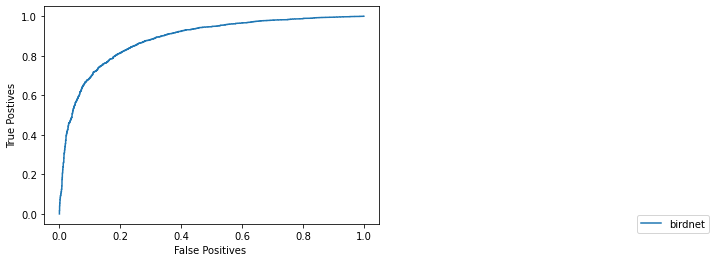

In [89]:
%reload_ext autoreload
generate_ROC_curves(automated_df_birdnet_test, manual_df, chunk_length = 3, label="birdnet")

0
0
2
20
target 1
confidence 1
automated df 1
0
0


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


4
7
target 6
confidence 6
automated df 6
0
0
5
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
8
30


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
9
43
target 11
confidence 11
automated df 11
0
0
0
0
5
15


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
0
0
6
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
1
3
target 2
confidence 2
automated df 2
0
0
0
0
4

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)



18


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 6
confidence 6
automated df 6
5
5
target 17
confidence 17
automated df 17
2
5
target 3
confidence 3
automated df 3
6
11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 10
confidence 10
automated df 10
12
50


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
13
17


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
2
6
target 2
confidence 2
automated df 2
21
23


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 20
confidence 20
automated df 20
0
0
0
0
1
8


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
17
13


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
21
15


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 29
confidence 29
automated df 29
0
0
0
0
2
7
target 2
confidence 2
automated df 2
5
4


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 7
confidence 7
automated df 7
14
15


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
14
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
0
0
0
0
11
38


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
7
36


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
12
11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
4
4
target 4
confidence 4
automated df 4
17


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

24
target 19
confidence 19
automated df 19
0
0
5
19


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 6
confidence 6
automated df 6
19
47


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 19
confidence 19
automated df 19
0
0
0
0
0
0
8
9


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
0
0
0
0
5
16


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 4
confidence 4
automated df 4
0
0
4
15


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
7
11


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 6
confidence 6
automated df 6
7
14


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
15
18


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
14
50


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 21
confidence 21
automated df 21
0
0
31
25


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 44
confidence 44
automated df 44
5
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 6
confidence 6
automated df 6
4
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 12
confidence 12
automated df 12
5
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
0
0
3
4


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
1
2
target 4
confidence 4
automated df 4
1
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 2
confidence 2
automated df 2
7
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
0
0
1
6
target 4
confidence 4
automated df 4
6
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 7
confidence 7
automated df 7
21
55


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 23
confidence 23
automated df 23
7
8


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 6
confidence 6
automated df 6
1
3
target 3
confidence 3
automated df 3
6
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
12
59


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
0
0
9
17


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
3
5
target

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


 4
confidence 4
automated df 4
3
44


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 10
confidence 10
automated df 10
27
40


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 29
confidence 29
automated df 29
2
2
target 5
confidence 5
automated df 

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


5
0
0
15
20


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
14
19


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 21
confidence 21
automated df 21
0
0
0
0
12
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
2
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 26
confidence 26
automated df 26
3
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 10
confidence 10
automated df 10
2
41


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
16
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 29
confidence 29
automated df 29
7
27


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
0
0
0
0
2
4
target 3
confidence 3
automated df 3
5
24


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
2
3
target 3
confidence 3
automated df 3
0
0
9
2


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 16
confidence 16
automated df 16
4
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 7
confidence 7
automated df 7
7
6
target 9
confidence 9
automated df 9
9
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
0
0
0
0
2
4


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 4
confidence 4
automated df 4
4
46


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
10
32


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 10
confidence 10
automated df 10
5
11


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 10
confidence 10
automated df 10
19
33


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 25
confidence 25
automated df 25
14
91


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 26
confidence 26
automated df 26
1
6
target 3
confidence 3
automated df 3
4
4


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 5
confidence 5
automated df 5
8
9


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 27
confidence 27
automated df 27
10
23


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
9
17


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 27
confidence 27
automated df 27
5
10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 6
confidence 6
automated df 6
0
0
0
0
0
0
0
0
0
0
2
11


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 2
confidence 2
automated df 2
0
0
0
0
7
15


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
1
10
target 5
confidence 5
automated df 

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


5
17
10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
12
17


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
3
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
11
19
target 14
confidence 14
automated df 14
0
0
4
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 4
confidence 4
automated df 4
11
17
target 10
confidence 10
automated df 10
8
15


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 13
confidence 13
automated df 13
0
0
0
0
0
0
11
11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
0
0
6
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
0
0
0
0
0
0
1
10


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 3
confidence 3
automated df 3
0
0
0
0
5
5


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
0
0
0
0
6
13
target 7
confidence 7
automated df 7
19
16


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
40
78


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 40
confidence 40
automated df 40
12
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
0
0
0
0
8
4


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
14
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
0
0
0
0
2
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 6
confidence 6
automated df 6
3
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
5
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
14
7
target 51
confidence 51
automated df 51
0
0
0
0
4
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 23
confidence 23
automated df 23
6
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
1
6
target 1
confidence 1
automated df 1
4
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 5
confidence 5
automated df 5
0
0
5
10


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 5
confidence 5
automated df 5
2
3
target 3
confidence 3
automated df 3
3
3


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 6
confidence 6
automated df 6
7
9


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
0
0
11
5


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
0
0
18
17


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
0
0
0
0
0
0
0
0
0
0
3
2
target 5
confidence 5
automated df 5
6
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
15
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
1
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 12
confidence 12
automated df 12
0
0
0
0
19
18


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 37
confidence 37
automated df 37
2
3
target 5
confidence 5
automated df 5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


0
0
12
11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
0
0
2
7
target 6
confidence 6
automated df 6
1
14
target 5
confidence 5
automated df 5


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


0
0
27
28


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 37
confidence 37
automated df 37
14
22


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
0
0
3
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
1
2
target 1
confidence 1
automated df 1
9
17


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 11
confidence 11
automated df 11
10
48


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 10
confidence 10
automated df 10
0
0
0
0
0
0
0
0
0
0
0
0


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


3
3
target 7
confidence 7
automated df 7
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 12
confidence 12
automated df 12
0
0
6
5
target 15
confidence 15
automated df 15
0
0
0
0
18
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
15
28


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 24
confidence 24
automated df 24
12
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
0
0
21
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 21
confidence 21
automated df 21
6
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
9
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
14
21
target 19
confidence 19
automated df 19
10
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 35
confidence 35
automated df 35
0
0
36
38
target 55
confidence 55
automated df 55
19
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
1
6
target 5
confidence 5
automated df 

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


5
0
0
7
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 12
confidence 12
automated df 12
13
25


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
0
0
0
0
2
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 6
confidence 6
automated df 6
4
3
target 4
confidence 4
automated df 4
5
26
target 4
confidence 4
automated df 4


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

14
29
target 16
confidence 16
automated df 16
0
0
13
26


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
0
0
10
5
target 12
confidence 12
automated df 12
1
1
target 1
confidence 1
automated df 1
21
32


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 31
confidence 31
automated df 31
8
102


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
0
0
0
0
0
0
13
10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
0
0
0
0
16
27
target 19
confidence 19
automated df 19
0
0
0
0
12
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 12
confidence 12
automated df 12
0
0
5
12
target

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

 4
confidence 4
automated df 4
6
10
target 19
confidence 19
automated df 19
12
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
0
0
0
0
13
19
target 12
confidence 12
automated df 12
0
0
5
4


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 10
confidence 10
automated df 10
2
4
target 2
confidence 2
automated df 2
6
27


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 10
confidence 10
automated df 10
21
32


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 21
confidence 21
automated df 21
0
0
21
17


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 25
confidence 25
automated df 25
0
0
5
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
0
0
0
0
0
0
0
0
1
1


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 1
confidence 1
automated df 1
33
64
target 33
confidence 33
automated df 33
31
47


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 31
confidence 31
automated df 31
13
63


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
9
25


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
0
0
18
22


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 84
confidence 84
automated df 84
1
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 25
confidence 25
automated df 25
10
10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 11
confidence 11
automated df 11
0
0
11
63


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
14
22


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 33
confidence 33
automated df 33
70
90


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 72
confidence 72
automated df 72
12
19


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
0
0
0
0
0
0
2
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 5
confidence 5
automated df 5
0
0
35
53


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 33
confidence 33
automated df 33
6
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 25
confidence 25
automated df 25
3
1
target 5
confidence 5
automated df 5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


4
6
target 10
confidence 10
automated df 10
19
11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
0
0
0
0
0
0
2
15


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
0
0
0
0
13
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
0
0
16
22


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
2
4
target 2
confidence 2
automated df 2
5
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 10
confidence 10
automated df 10
0
0
0
0
18
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
0
0
17
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
10
56


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 10
confidence 10
automated df 10
0
0
10
9


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
9
4


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 11
confidence 11
automated df 11
2
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
8
30


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
6
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 5
confidence 5
automated df 5
5
7
target 6
confidence 6
automated df 6
0
0
8
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
8
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 31
confidence 31
automated df 31
0
0
0
0
0
0
3
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 6
confidence 6
automated df 6
27
27


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 34
confidence 34
automated df 34
7
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
5
21


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 6
confidence 6
automated df 6
8
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 8
confidence 8
automated df 8
8
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 27
confidence 27
automated df 27
0
0
8
8


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
12
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
74
53


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 182
confidence 182
automated df 182
0
0
3
3
target 4
confidence 4


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

automated df 4
2
1
target 2
confidence 2
automated df 2
13
12


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
0
0
7
5


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
12
15


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
2
2
target 1
confidence 1
automated df 1
9
34


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 22
confidence 22
automated df 22
8
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
4
3
target 5


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


confidence 5
automated df 5
0
0
2
11
target 2
confidence 2
automated df 2
27
63


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 44
confidence 44
automated df 44
0
0
0
0
8
8


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
8
8


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
7
10


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 10
confidence 10
automated df 10
23
5


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 24
confidence 24
automated df 24
6
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 6
confidence 6
automated df 6
0
0
5
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 5
confidence 5
automated df 5
3
8
target 3
confidence 3
automated df 3
0
0


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


2
4


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
0
0
10
29
target 10
confidence 10
automated df 10
17
33


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
0
0
0
0
0
0
3
2


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
0
0
1
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
0
0
4
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 23
confidence 23
automated df 23
4
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 6
confidence 6
automated df 6
0
0
0
0
2
4
target 2
confidence 2
automated df 2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


2
8


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 12
confidence 12
automated df 12
0
0
4
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
9
17


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
0
0
6
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 30
confidence 30
automated df 30
6
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
9
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
0
0
3
8
target 3
confidence 3
automated df 3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

1
11
target 6
confidence 6
automated df 6
6
10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
0
0
2
7
target 2
confidence 2
automated df 2
2
1


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 2
confidence 2
automated df 2
0
0
2
6
target 3
confidence 3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


automated df 3
2
8
target 5
confidence 5
automated df 5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


6
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
9
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
21
56


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 24
confidence 24
automated df 24
18
40


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 21
confidence 21
automated df 21
0
0
26
50
target 51
confidence 51
automated df 51
6
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
15
28


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 24
confidence 24
automated df 24
12
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
2
14


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
9
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 24
confidence 24
automated df 24
0
0
6
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 5
confidence 5
automated df 5
1
5
target 1
confidence 1
automated df 1
15
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 17
confidence 17
automated df 17
9
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
5
10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 9
confidence 9
automated df 9
8
49


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 7
confidence 7
automated df 7
11
22


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 11
confidence 11
automated df 11
10
24


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 9
confidence 9
automated df 9
8
27


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
9
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 27
confidence 27
automated df 27
0
0
11
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
1
1
target 1
confidence 1
automated df 1
18
41


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 31
confidence 31
automated df 31
1
9
target 4
confidence 4
automated df 4
7
9


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 6
confidence 6
automated df 6
0
0
0
0
0
0
4
98


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 12
confidence 12
automated df 12
36
56


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 36
confidence 36
automated df 36
26
57


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 33
confidence 33
automated df 33
7
8


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
6
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
16
15


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 46
confidence 46
automated df 46
5
8


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 31
confidence 31
automated df 31
13
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 45
confidence 45
automated df 45
39
99


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 77
confidence 77
automated df 77
7
69


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 10
confidence 10
automated df 10
8
44


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
0
0
13
10


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
12
31


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
0
0
14
14


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
8
16


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
4
38


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
0
0
21
28


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
0
0
4
19


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 27
confidence 27
automated df 27
10
1


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 9
confidence 9
automated df 9
3
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
9
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
0
0
2
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
10
23


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 9
confidence 9
automated df 9
8
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
16
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 39
confidence 39
automated df 39
14
10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
0
0
7
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
2
3
target 5
confidence 

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

5
automated df 5
2
11
target 5
confidence 5
automated df 5


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


17
18
target 53
confidence 53
automated df 53
0
0
9
15


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 9
confidence 9
automated df 9
23
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 28
confidence 28
automated df 28
7
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 11
confidence 11
automated df 11
3
3
target 2
confidence 2
automated df 2
0
0
1
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMet

target 11
confidence 11
automated df 11
2
2
target 3
confidence 3
automated df 3
10
10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
1
3
target 3
confidence 3
automated df 3
2
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 2
confidence 2
automated df 2
7
4


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 8
confidence 8
automated df 8
1
8


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
1
1
target 1
confidence 1
automated df 1
11
19


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 10
confidence 10
automated df 10
0
0
0
0
4
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 4
confidence 4
automated df 4
0
0
0
0
0
0
0
0
3
7


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 3
confidence 3
automated df 3
7
14


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
4
37


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
27
29


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 47
confidence 47
automated df 47
2
12


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 18
confidence 18
automated df 18
5
5
target 4
confidence 4
automated df 4
29
21


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be s

target 29
confidence 29
automated df 29
7
26


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
3
1
target 4
confidence 4
automated df 4
0

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]



0
5
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 10
confidence 10
automated df 10
2
2
target 4
confidence 4
automated df 4
0
0


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


14
24
target 21
confidence 21
automated df 21
10
10


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
11
8


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
5
5
target 5
confidence 5
automated df 5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

19
12
target 30
confidence 30
automated df 30
0
0
5
7


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 6
confidence 6
automated df 6
6
13
target 15
confidence 15
automated df 15
4
2
target 5
confidence 5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


automated df 5
4
2
target 4
confidence 4
automated df 4
28
37


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 34
confidence 34
automated df 34
0
0
1
9
target 5

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)



confidence 5
automated df 5
32
21


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 90
confidence 90
automated df 90
0
0
71
46


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 89
confidence 89
automated df 89
8
8


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
14
9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
15
48


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
14
50


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
2
8
target 2
confidence 2
automated df 2
1
18


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 36
confidence 36
automated df 36
10
22


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 21
confidence 21
automated df 21
15
26


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 24
confidence 24
automated df 24
18
23


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 54
confidence 54
automated df 54
5
17


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 5
confidence 5
automated df 5
9
11


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 7
confidence 7
automated df 7
2
3
target 1
confidence 1
automated df 1
6
6


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
3
2
target 4
confidence 4
automated df 4
11
3


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
29
57
target 37
confidence 37
automated df 37
7
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
4
4


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 20
confidence 20
automated df 20
8
5


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
0
0
11
40


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 40
confidence 40
automated df 40
5
20


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 35
confidence 35
automated df 35
1
10
target 2
confidence 2
automated df 2
5

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]



9


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
1
2
target 7
confidence 7
automated df 7
5
14


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
0
0
0
0
17
6


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 38
confidence 38
automated df 38
2
13


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

target 8
confidence 8
automated df 8
0
0
21
48
target 21
confidence 21
automated df 21
26
29


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 31
confidence 31
automated df 31
0
0
6
40


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
8
7


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 19
confidence 19
automated df 19
11
20


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
3
1
target 2
confidence 2
automated df 2
17
97


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 47
confidence 47
automated df 47
0
0
3
2


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


target 4
confidence 4
automated df 4
0
0
0
0
5
16


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
0
0
0
0


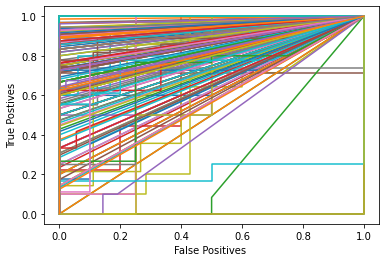

In [91]:
%reload_ext autoreload
generate_ROC_curves_mutliclass(automated_df_birdnet_test, manual_df, label="", chunk_length=3)